In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.feature_selection import mutual_info_classif
import ppscore as pps
import seaborn as sns

In [2]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using:", device)

Using: cuda


In [3]:
class CricketDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X.values, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.long)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

__2 LAYER MODELS__

In [ ]:
class LinearModel2Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, num_classes)
        )
    def forward(self, x):
        return self.fc(x)

In [ ]:
class CNNModel2Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(32, num_classes)
    
    def forward(self, x):
        x = x.unsqueeze(1)  # [B, 1, F]
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [ ]:
class RNNModel2Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.rnn = nn.RNN(input_dim, 32, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

In [ ]:
class LSTMModel2Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 32, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

In [ ]:
class GRUModel2Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.gru = nn.GRU(input_dim, 32, batch_first=True)
        self.fc = nn.Linear(32, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])

In [ ]:
class BiLSTMModel2Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.bilstm = nn.LSTM(input_dim, 32, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.bilstm(x)
        return self.fc(out[:, -1, :])

In [ ]:
class TransformerModel2Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, 8)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=8, nhead=4)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=2)
        self.fc = nn.Linear(8, num_classes)

    def forward(self, x):
        x = self.input_proj(x)
        x = x.unsqueeze(1)
        x = self.transformer(x)
        x = x.mean(dim=1)
        return self.fc(x)

__3 LAYERS MODELS__

In [ ]:
class LinearModel3Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32,16),
            nn.ReLU(),
            nn.Linear(16, num_classes)
        )
    def forward(self, x):
        return self.fc(x)

In [ ]:
class CNNModel3Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv1d(1, 16, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(16, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv1d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.AdaptiveAvgPool1d(1)
        )
        self.fc = nn.Linear(64, num_classes)
    
    def forward(self, x):
        x = x.unsqueeze(1)  # [B, 1, F]
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [ ]:
class RNNModel3Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.rnn = nn.RNN(input_dim, 64, num_layers=2, batch_first=True)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.rnn(x)
        return self.fc(out[:, -1, :])

In [ ]:
class LSTMModel3Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, 64, num_layers=2, batch_first=True)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])

In [ ]:
class GRUModel3Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.gru = nn.GRU(input_dim, 64, num_layers=2, batch_first=True)
        self.fc = nn.Linear(64, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)
        out, _ = self.gru(x)
        return self.fc(out[:, -1, :])

In [ ]:
class BiLSTMModel3Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.bilstm = nn.LSTM(input_dim, 32, batch_first=True, bidirectional=True)  # Output: 64 dims
        self.fc1 = nn.Linear(64, 32)  
        self.relu = nn.ReLU()         
        self.fc2 = nn.Linear(32, num_classes)  

    def forward(self, x):
        x = x.unsqueeze(1)  
        out, _ = self.bilstm(x)  
        x = out[:, -1, :]        
        x = self.relu(self.fc1(x))  
        return self.fc2(x)    

In [ ]:
class TransformerModel3Layer(nn.Module):
    def __init__(self, input_dim, num_classes=5):
        super().__init__()
        self.input_proj = nn.Linear(input_dim, 8)
        self.encoder_layer = nn.TransformerEncoderLayer(d_model=8, nhead=4)
        self.transformer = nn.TransformerEncoder(self.encoder_layer, num_layers=2)
        
        self.fc1 = nn.Linear(8, 32)   
        self.relu = nn.ReLU()         
        self.fc2 = nn.Linear(32, num_classes) 

    def forward(self, x):
        x = self.input_proj(x)
        x = x.unsqueeze(1)
        x = self.transformer(x)
        x = x.mean(dim=1)          
        x = self.relu(self.fc1(x)) 
        return self.fc2(x)   

__TRAIN AND TEST FUNCTION__

In [18]:
# Your label mapping
label_map = {0: 0, 1: 1, 2: 2, 4: 3, 6: 4}
reverse_label_map = {v: k for k, v in label_map.items()}

In [19]:
def train_and_evaluate(model, train_loader, test_loader, epochs=50, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        train_losses.append(total_train_loss / len(train_loader))

        model.eval()
        total_test_loss = 0
        all_preds, all_targets = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = model(xb)
                loss = criterion(outputs, yb)
                total_test_loss += loss.item()
                all_preds.append(outputs.argmax(1).cpu().numpy())
                all_targets.append(yb.cpu().numpy())
        test_losses.append(total_test_loss / len(test_loader))

        if epoch == 0 or (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    # Concatenate all predictions and targets
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)

    # Reverse map predictions and targets to original labels
    all_preds_original = np.vectorize(reverse_label_map.get)(all_preds)
    all_targets_original = np.vectorize(reverse_label_map.get)(all_targets)

    original_labels = sorted(label_map.keys())  # [0, 1, 2, 4, 6]

    print("\nClassification Report:")
    print(classification_report(all_targets_original,all_preds_original, labels=original_labels))
    print("Accuracy:", accuracy_score(all_targets_original, all_preds_original))

    # Confusion Matrix
    cm = confusion_matrix(all_targets_original, all_preds_original, labels=original_labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=original_labels, yticklabels=original_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Loss Plot
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model.__class__.__name__} Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

In [20]:
def train_and_evaluate1(model, train_loader, test_loader, epochs=100, lr=0.001):
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    train_losses = []
    test_losses = []

    for epoch in range(epochs):
        model.train()
        total_train_loss = 0
        for xb, yb in train_loader:
            xb, yb = xb.to(device), yb.to(device)
            optimizer.zero_grad()
            outputs = model(xb)
            loss = criterion(outputs, yb)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        train_losses.append(total_train_loss / len(train_loader))

        model.eval()
        total_test_loss = 0
        all_preds, all_targets = [], []
        with torch.no_grad():
            for xb, yb in test_loader:
                xb, yb = xb.to(device), yb.to(device)
                outputs = model(xb)
                loss = criterion(outputs, yb)
                total_test_loss += loss.item()
                all_preds.append(outputs.argmax(1).cpu().numpy())
                all_targets.append(yb.cpu().numpy())
        test_losses.append(total_test_loss / len(test_loader))

        if epoch == 0 or (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1}, Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")

    # Concatenate all predictions and targets
    all_preds = np.concatenate(all_preds)
    all_targets = np.concatenate(all_targets)

    # Reverse map predictions and targets to original labels
    all_preds_original = np.vectorize(reverse_label_map.get)(all_preds)
    all_targets_original = np.vectorize(reverse_label_map.get)(all_targets)

    original_labels = sorted(label_map.keys())  # [0, 1, 2, 4, 6]

    print("\nClassification Report:")
    print(classification_report(all_targets_original,all_preds_original, labels=original_labels))
    print("Accuracy:", accuracy_score(all_targets_original, all_preds_original))

    # Confusion Matrix
    cm = confusion_matrix(all_targets_original, all_preds_original, labels=original_labels)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=original_labels, yticklabels=original_labels)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Loss Plot
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"{model.__class__.__name__} Loss Curve")
    plt.legend()
    plt.grid(True)
    plt.show()

***CSV IMPORT***

In [21]:
df = pd.read_csv('Antim_Dataset.csv')
df.head()

,Venue,Date,Match No.,Innings No.,Batting Team,Bowling Team,Over,Striker,Non Striker,Bowler,...,Previous Average Striker Runs 5,Previous Average Striker Runs 6,Previous Average Conceded Runs by Bowler 3,Previous Average Conceded Runs by Bowler 6,Previous Current Run Rate,Previous Pressure Index,Previous Wickets Remaining,Run Conceded by bowler on prev Bowl,Bowler Economy,Bowler Economy till prev ball
0,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.1,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.000000,2.000000,10.0,0.0,7.0,0.0
1,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.2,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.000000,0.760224,10.0,0.0,7.0,7.0
2,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.3,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.500000,0.422486,10.0,0.0,7.0,7.0
3,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.4,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.333333,0.651026,10.0,0.0,7.0,7.0
4,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.5,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.0,0.500000,0.645517,10.0,1.0,7.0,7.0


In [22]:
df.columns

Index(['Venue', 'Date', 'Match No.', 'Innings No.', 'Batting Team',
       'Bowling Team', 'Over', 'Striker', 'Non Striker', 'Bowler',
       'Runs by Batsman', 'Extras', 'Total runs on that bowl',
       'Runs Conceded by Bowler', 'Cumulative Runs by Batsman',
       'Cumulative Runs Conceded by Bowler', 'Cumulative Team Runs', 'Year',
       'Match ID', 'is_wicket', 'Total Wickets', 'is_legal_delivery',
       'Team Balls Count', 'Striker Balls Count', 'Team Balls Left',
       'Batsman Runs on Previous Ball', 'Total Runs on Previous Ball',
       'Over_Phase', 'Striker Strike Rate', 'Partnership Runs', 'is_dot',
       'Dot Count', 'is_boundary', 'Boundary Count', 'Average Striker Runs 3',
       'Average Striker Runs 4', 'Average Striker Runs 5',
       'Average Striker Runs 6', 'Average Conceded Runs by Bowler 3',
       'Average Conceded Runs by Bowler 6', 'Target', 'wicket_remaining',
       'Resources Remaining', 'Bowling Style', 'Venue ID', 'Batting Team ID',
       'Bowling T

***ONLY FOR 0,1,2,4,6***

In [23]:
df = df[df['Runs by Batsman'].isin([0,1,2,4,6])]

In [24]:
df['label_mapped'] = df['Runs by Batsman'].map(label_map)
df.head()

,Venue,Date,Match No.,Innings No.,Batting Team,Bowling Team,Over,Striker,Non Striker,Bowler,...,Previous Average Striker Runs 6,Previous Average Conceded Runs by Bowler 3,Previous Average Conceded Runs by Bowler 6,Previous Current Run Rate,Previous Pressure Index,Previous Wickets Remaining,Run Conceded by bowler on prev Bowl,Bowler Economy,Bowler Economy till prev ball,label_mapped
0,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.1,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.000000,2.000000,10.0,0.0,7.0,0.0,0
1,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.2,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.000000,0.760224,10.0,0.0,7.0,7.0,0
2,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.3,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.500000,0.422486,10.0,0.0,7.0,7.0,0
3,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.4,RD Gaikwad,DP Conway,Mohammed Shami,...,0.0,0.0,0.0,0.333333,0.651026,10.0,0.0,7.0,7.0,1
4,"Narendra Modi Stadium, Ahmedabad",2023-03-31,1,1,Chennai Super Kings,Gujarat Titans,0.5,DP Conway,RD Gaikwad,Mohammed Shami,...,0.0,0.0,0.0,0.500000,0.645517,10.0,1.0,7.0,7.0,0


In [25]:
df.columns

Index(['Venue', 'Date', 'Match No.', 'Innings No.', 'Batting Team',
       'Bowling Team', 'Over', 'Striker', 'Non Striker', 'Bowler',
       'Runs by Batsman', 'Extras', 'Total runs on that bowl',
       'Runs Conceded by Bowler', 'Cumulative Runs by Batsman',
       'Cumulative Runs Conceded by Bowler', 'Cumulative Team Runs', 'Year',
       'Match ID', 'is_wicket', 'Total Wickets', 'is_legal_delivery',
       'Team Balls Count', 'Striker Balls Count', 'Team Balls Left',
       'Batsman Runs on Previous Ball', 'Total Runs on Previous Ball',
       'Over_Phase', 'Striker Strike Rate', 'Partnership Runs', 'is_dot',
       'Dot Count', 'is_boundary', 'Boundary Count', 'Average Striker Runs 3',
       'Average Striker Runs 4', 'Average Striker Runs 5',
       'Average Striker Runs 6', 'Average Conceded Runs by Bowler 3',
       'Average Conceded Runs by Bowler 6', 'Target', 'wicket_remaining',
       'Resources Remaining', 'Bowling Style', 'Venue ID', 'Batting Team ID',
       'Bowling T

In [26]:
feature_cols = [
    # Match & team context
    "Venue ID",
    "Match No.",
    "Innings No.",
    "Batting Team ID",
    "Bowling Team ID",

    # Player info
    "Striker ID",
    "Non Striker ID",
    "Bowler ID",
    "Bowling Style ID",

    # Bowler performance history
    'Bowler Economy till prev ball',
    'Run Conceded by bowler on prev Bowl',
    "Previous Average Conceded Runs by Bowler 3",
    "Previous Average Conceded Runs by Bowler 6",

    # Batter form
    "Previous Average Striker Runs 3",
    "Previous Average Striker Runs 4",
    "Previous Average Striker Runs 5",
    "Previous Average Striker Runs 6",

    # Match dynamics
    "Team Balls Count",
    "Team Balls Left",
    "Total Wickets",
    "wicket_remaining",
    "Resources Remaining",

    # Momentum/context
    "Dot Count",
    "Boundary Count",
    "Previous Current Run Rate",
    "Req. Run Rate",

    # Game phase
    "Over",
    "Over_Phase",

    # Strategy pressure
    "Previous Pressure Index"
]

target = 'Runs by Batsman'

In [27]:
x = df[feature_cols]
y = df['label_mapped']

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=42)

In [29]:
train_loader = DataLoader(CricketDataset(x_train, y_train), batch_size=64, shuffle=True)
test_loader = DataLoader(CricketDataset(x_test, y_test), batch_size=64, shuffle=False)

In [30]:
print("x_train dtype:\n", x_train.dtypes)
print("\ny_train dtype:\n", y_train.dtype)

x_train dtype:
 Venue ID                                        int64
Match No.                                       int64
Innings No.                                     int64
Batting Team ID                                 int64
Bowling Team ID                                 int64
Striker ID                                      int64
Non Striker ID                                  int64
Bowler ID                                       int64
Bowling Style ID                                int64
Bowler Economy till prev ball                 float64
Run Conceded by bowler on prev Bowl           float64
Previous Average Conceded Runs by Bowler 3    float64
Previous Average Conceded Runs by Bowler 6    float64
Previous Average Striker Runs 3               float64
Previous Average Striker Runs 4               float64
Previous Average Striker Runs 5               float64
Previous Average Striker Runs 6               float64
Team Balls Count                                int64
Team Balls L

In [31]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print(x_train.dtypes)
print("\n",x_test.dtypes)

Venue ID                                      float32
Match No.                                     float32
Innings No.                                   float32
Batting Team ID                               float32
Bowling Team ID                               float32
Striker ID                                    float32
Non Striker ID                                float32
Bowler ID                                     float32
Bowling Style ID                              float32
Bowler Economy till prev ball                 float32
Run Conceded by bowler on prev Bowl           float32
Previous Average Conceded Runs by Bowler 3    float32
Previous Average Conceded Runs by Bowler 6    float32
Previous Average Striker Runs 3               float32
Previous Average Striker Runs 4               float32
Previous Average Striker Runs 5               float32
Previous Average Striker Runs 6               float32
Team Balls Count                              float32
Team Balls Left             

In [ ]:
model_dict = {
    "Linear": LinearModel2Layer,
    "CNN": CNNModel2Layer,
    "RNN": RNNModel2Layer,
    "LSTM": LSTMModel2Layer,
    "GRU": GRUModel2Layer,
    "BiLSTM": BiLSTMModel2Layer,
    "Transformer": TransformerModel2Layer,
}

In [ ]:
model_dict1 = {
    "Linear": LinearModel3Layer,
    "CNN": CNNModel3Layer,
    "RNN": RNNModel3Layer,
    "LSTM": LSTMModel3Layer,
    "GRU": GRUModel3Layer,
    "BiLSTM": BiLSTMModel3Layer,
    "Transformer": TransformerModel3Layer,
}

In [34]:
for name, model_cls in model_dict.items():
    print(f"\n{'='*30}\nCreating {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5)
    print(model)


Creating Linear Model
LinearModel(
  (fc): Sequential(
    (0): Linear(in_features=29, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=5, bias=True)
  )
)

Creating CNN Model
CNNModel(
  (conv): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): AdaptiveAvgPool1d(output_size=1)
  )
  (fc): Linear(in_features=32, out_features=5, bias=True)
)

Creating RNN Model
RNNModel(
  (rnn): RNN(29, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=5, bias=True)
)

Creating LSTM Model
LSTMModel(
  (lstm): LSTM(29, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=5, bias=True)
)

Creating GRU Model
GRUModel(
  (gru): GRU(29, 32, batch_first=True)
  (fc): Linear(in_features=32, out_features=5, bias=True)
)

Creating

c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [35]:
for name, model_cls in model_dict1.items():
    print(f"\n{'='*30}\nCreating {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5)
    print(model)


Creating Linear Model
LinearModel1(
  (fc): Sequential(
    (0): Linear(in_features=29, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): ReLU()
    (4): Linear(in_features=32, out_features=16, bias=True)
    (5): ReLU()
    (6): Linear(in_features=16, out_features=5, bias=True)
  )
)

Creating CNN Model
CNNModel1(
  (conv): Sequential(
    (0): Conv1d(1, 16, kernel_size=(3,), stride=(1,), padding=(1,))
    (1): ReLU()
    (2): Conv1d(16, 32, kernel_size=(3,), stride=(1,), padding=(1,))
    (3): ReLU()
    (4): Conv1d(32, 64, kernel_size=(3,), stride=(1,), padding=(1,))
    (5): ReLU()
    (6): AdaptiveAvgPool1d(output_size=1)
  )
  (fc): Linear(in_features=64, out_features=5, bias=True)
)

Creating RNN Model
RNNModel1(
  (rnn): RNN(29, 64, num_layers=2, batch_first=True)
  (fc): Linear(in_features=64, out_features=5, bias=True)
)

Creating LSTM Model
LSTMModel1(
  (lstm): LSTM(29, 64, num_layers=2, batch_first=True)
  (fc


Training Linear Model
Epoch 1, Train Loss: 1.4198, Test Loss: 1.3352
Epoch 5, Train Loss: 1.3001, Test Loss: 1.3089
Epoch 10, Train Loss: 1.2829, Test Loss: 1.3036
Epoch 15, Train Loss: 1.2683, Test Loss: 1.2688
Epoch 20, Train Loss: 1.2538, Test Loss: 1.2705
Epoch 25, Train Loss: 1.2393, Test Loss: 1.2481
Epoch 30, Train Loss: 1.2255, Test Loss: 1.2677
Epoch 35, Train Loss: 1.2073, Test Loss: 1.2350
Epoch 40, Train Loss: 1.1977, Test Loss: 1.2334
Epoch 45, Train Loss: 1.1867, Test Loss: 1.2212
Epoch 50, Train Loss: 1.1719, Test Loss: 1.1894

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.62      0.61      3291
           1       0.47      0.70      0.56      3213
           2       0.67      0.00      0.01       535
           4       0.48      0.19      0.27      1087
           6       0.28      0.03      0.05       596

    accuracy                           0.52      8722
   macro avg       0.50      0.31      0.30    

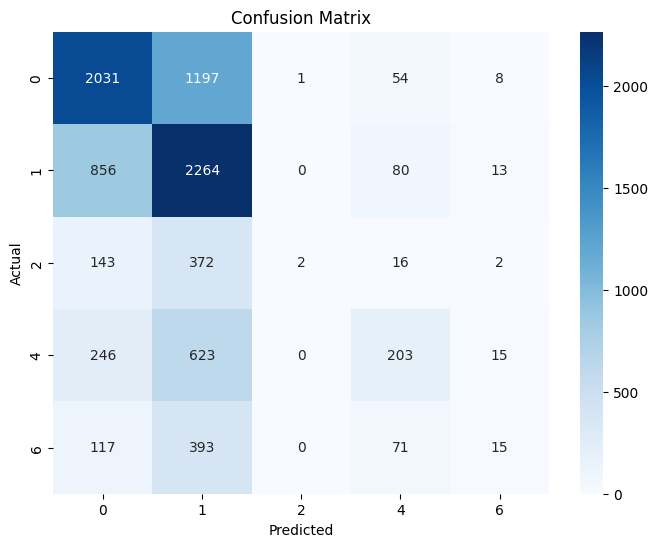

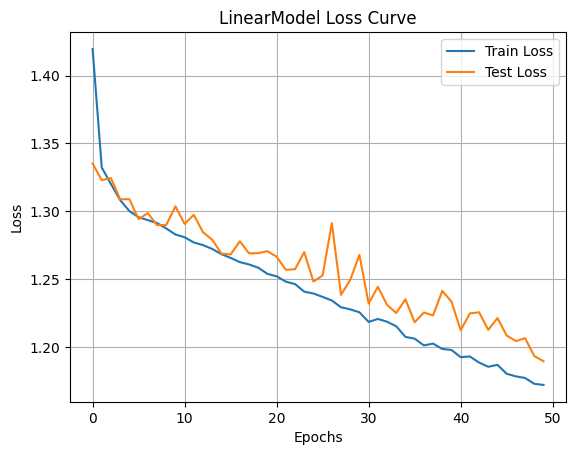

Time taken: 54.31 sec

Training CNN Model
Epoch 1, Train Loss: 1.3944, Test Loss: 1.3504
Epoch 5, Train Loss: 1.3350, Test Loss: 1.3509
Epoch 10, Train Loss: 1.3196, Test Loss: 1.3325
Epoch 15, Train Loss: 1.3132, Test Loss: 1.3164
Epoch 20, Train Loss: 1.3077, Test Loss: 1.3249
Epoch 25, Train Loss: 1.3052, Test Loss: 1.3116
Epoch 30, Train Loss: 1.3021, Test Loss: 1.3127
Epoch 35, Train Loss: 1.3002, Test Loss: 1.3062
Epoch 40, Train Loss: 1.2985, Test Loss: 1.3082
Epoch 45, Train Loss: 1.2958, Test Loss: 1.3071
Epoch 50, Train Loss: 1.2946, Test Loss: 1.3066

Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.59      0.51      3291
           1       0.43      0.58      0.49      3213
           2       0.00      0.00      0.00       535
           4       0.21      0.01      0.01      1087
           6       0.00      0.00      0.00       596

    accuracy                           0.44      8722
   macro avg       0.22     

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


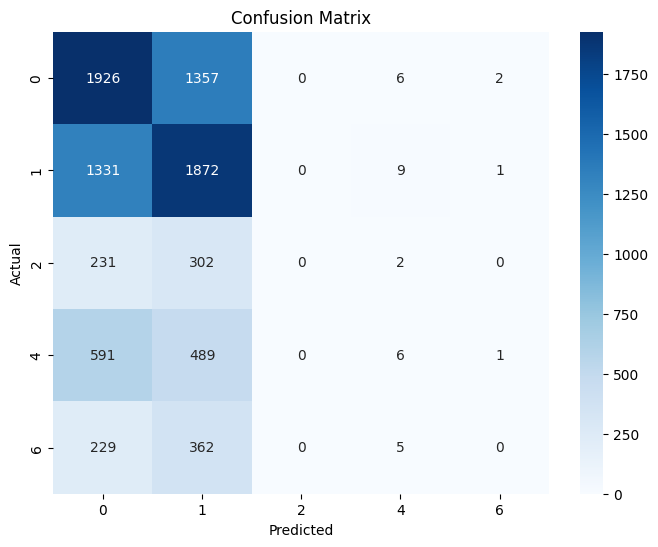

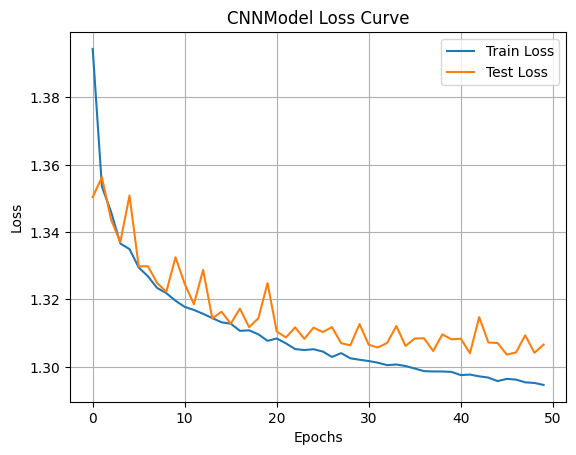

Time taken: 65.66 sec

Training RNN Model
Epoch 1, Train Loss: 1.3592, Test Loss: 1.3399
Epoch 5, Train Loss: 1.3249, Test Loss: 1.3284
Epoch 10, Train Loss: 1.3117, Test Loss: 1.3096
Epoch 15, Train Loss: 1.3031, Test Loss: 1.3078
Epoch 20, Train Loss: 1.2975, Test Loss: 1.2993
Epoch 25, Train Loss: 1.2957, Test Loss: 1.3137
Epoch 30, Train Loss: 1.2912, Test Loss: 1.2917
Epoch 35, Train Loss: 1.2863, Test Loss: 1.2870
Epoch 40, Train Loss: 1.2790, Test Loss: 1.2821
Epoch 45, Train Loss: 1.2745, Test Loss: 1.2770
Epoch 50, Train Loss: 1.2695, Test Loss: 1.2687

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54      3291
           1       0.44      0.64      0.52      3213
           2       0.00      0.00      0.00       535
           4       0.37      0.08      0.13      1087
           6       0.00      0.00      0.00       596

    accuracy                           0.46      8722
   macro avg       0.26     

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


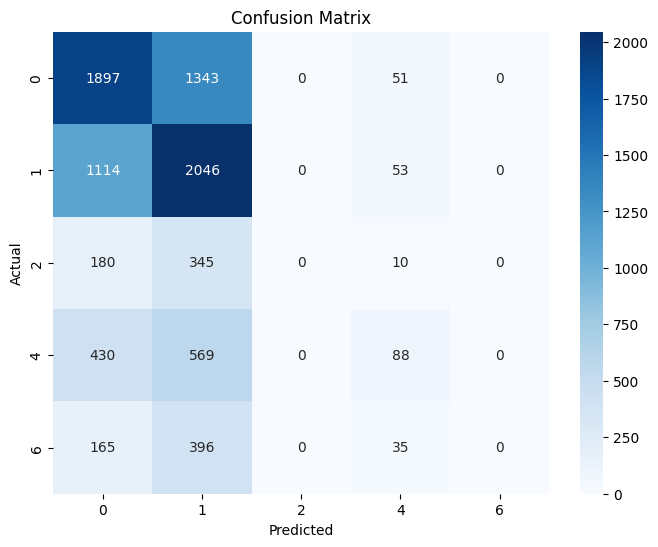

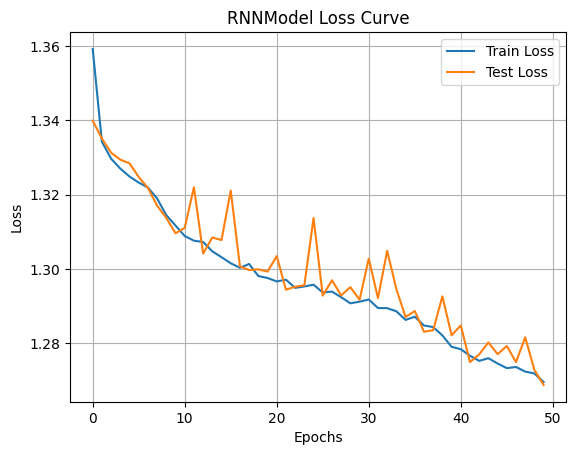

Time taken: 73.77 sec

Training LSTM Model
Epoch 1, Train Loss: 1.3547, Test Loss: 1.3376
Epoch 5, Train Loss: 1.3100, Test Loss: 1.3095
Epoch 10, Train Loss: 1.2878, Test Loss: 1.2940
Epoch 15, Train Loss: 1.2763, Test Loss: 1.2783
Epoch 20, Train Loss: 1.2667, Test Loss: 1.2749
Epoch 25, Train Loss: 1.2572, Test Loss: 1.2638
Epoch 30, Train Loss: 1.2478, Test Loss: 1.2578
Epoch 35, Train Loss: 1.2387, Test Loss: 1.2499
Epoch 40, Train Loss: 1.2292, Test Loss: 1.2478
Epoch 45, Train Loss: 1.2190, Test Loss: 1.2422
Epoch 50, Train Loss: 1.2096, Test Loss: 1.2299

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.49      0.55      3291
           1       0.44      0.78      0.56      3213
           2       0.00      0.00      0.00       535
           4       0.46      0.19      0.27      1087
           6       0.33      0.01      0.02       596

    accuracy                           0.50      8722
   macro avg       0.37    

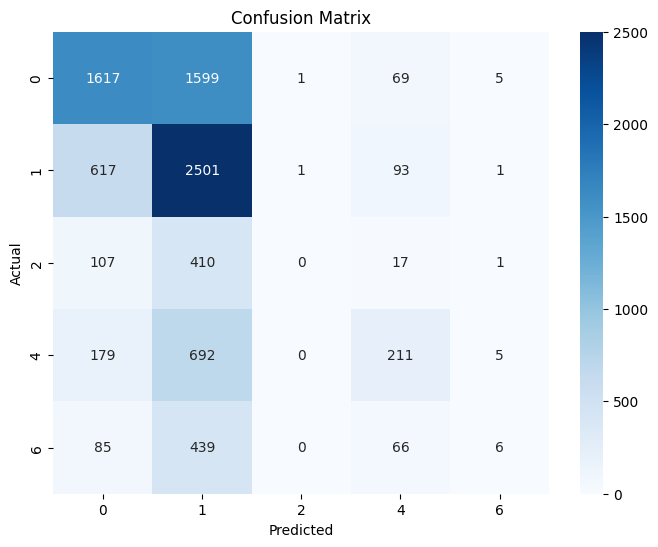

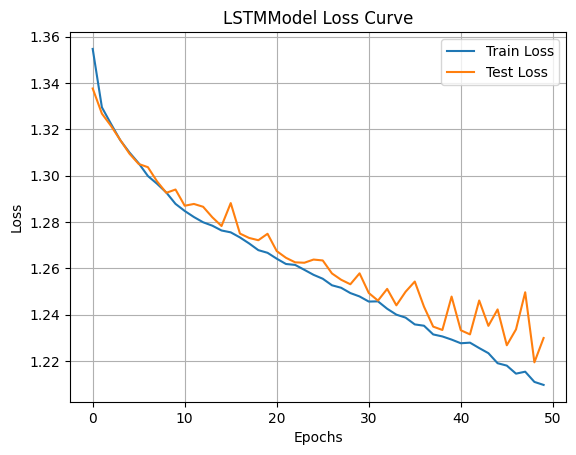

Time taken: 85.78 sec

Training GRU Model
Epoch 1, Train Loss: 1.3559, Test Loss: 1.3323
Epoch 5, Train Loss: 1.3035, Test Loss: 1.3082
Epoch 10, Train Loss: 1.2871, Test Loss: 1.2866
Epoch 15, Train Loss: 1.2782, Test Loss: 1.2876
Epoch 20, Train Loss: 1.2682, Test Loss: 1.2735
Epoch 25, Train Loss: 1.2617, Test Loss: 1.2676
Epoch 30, Train Loss: 1.2524, Test Loss: 1.2579
Epoch 35, Train Loss: 1.2441, Test Loss: 1.2465
Epoch 40, Train Loss: 1.2286, Test Loss: 1.2404
Epoch 45, Train Loss: 1.2177, Test Loss: 1.2374
Epoch 50, Train Loss: 1.2077, Test Loss: 1.2132

Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      3291
           1       0.45      0.74      0.56      3213
           2       0.00      0.00      0.00       535
           4       0.48      0.16      0.24      1087
           6       0.27      0.01      0.02       596

    accuracy                           0.51      8722
   macro avg       0.36     

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


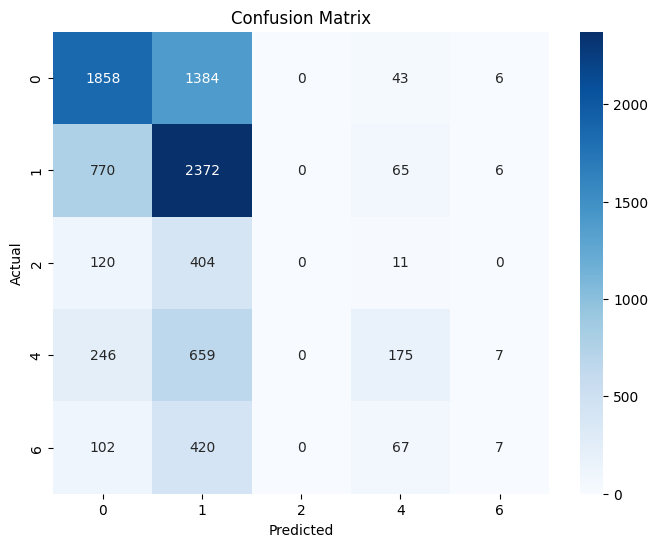

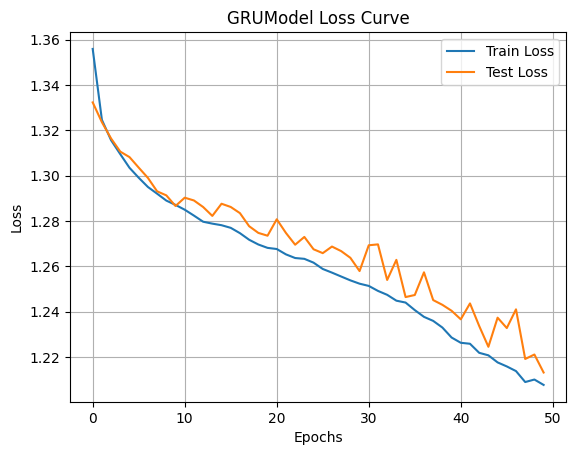

Time taken: 74.98 sec

Training BiLSTM Model
Epoch 1, Train Loss: 1.3631, Test Loss: 1.3369
Epoch 5, Train Loss: 1.3137, Test Loss: 1.3181
Epoch 10, Train Loss: 1.2934, Test Loss: 1.2983
Epoch 15, Train Loss: 1.2825, Test Loss: 1.2866
Epoch 20, Train Loss: 1.2728, Test Loss: 1.2858
Epoch 25, Train Loss: 1.2627, Test Loss: 1.2825
Epoch 30, Train Loss: 1.2554, Test Loss: 1.2714
Epoch 35, Train Loss: 1.2438, Test Loss: 1.2632
Epoch 40, Train Loss: 1.2358, Test Loss: 1.2412
Epoch 45, Train Loss: 1.2242, Test Loss: 1.2429
Epoch 50, Train Loss: 1.2158, Test Loss: 1.2269

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.67      0.60      3291
           1       0.48      0.62      0.54      3213
           2       0.50      0.00      0.00       535
           4       0.43      0.17      0.24      1087
           6       0.35      0.03      0.06       596

    accuracy                           0.51      8722
   macro avg       0.46  

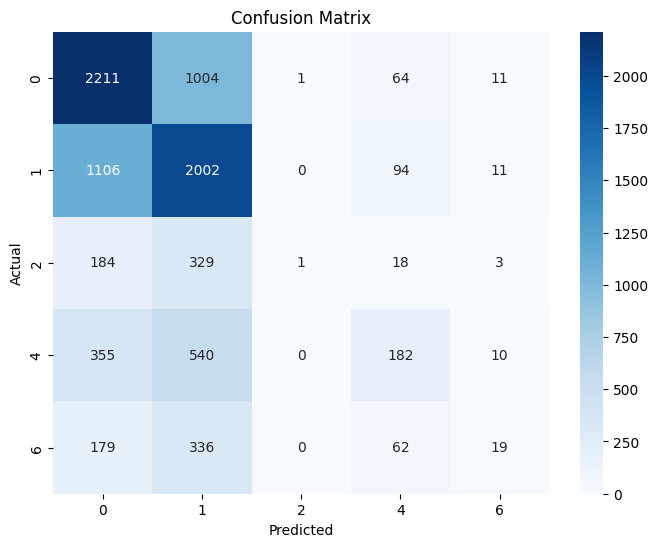

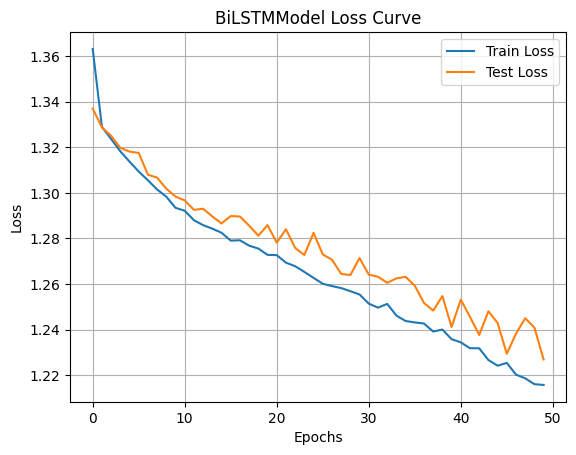

Time taken: 83.11 sec

Training Transformer Model


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Train Loss: 1.3523, Test Loss: 1.3365
Epoch 5, Train Loss: 1.3310, Test Loss: 1.3295
Epoch 10, Train Loss: 1.3085, Test Loss: 1.3032
Epoch 15, Train Loss: 1.2947, Test Loss: 1.2888
Epoch 20, Train Loss: 1.2879, Test Loss: 1.2817
Epoch 25, Train Loss: 1.2738, Test Loss: 1.2635
Epoch 30, Train Loss: 1.2604, Test Loss: 1.2510
Epoch 35, Train Loss: 1.2433, Test Loss: 1.2401
Epoch 40, Train Loss: 1.2268, Test Loss: 1.2076
Epoch 45, Train Loss: 1.2081, Test Loss: 1.1867
Epoch 50, Train Loss: 1.1942, Test Loss: 1.1941

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.65      0.62      3291
           1       0.46      0.68      0.55      3213
           2       0.00      0.00      0.00       535
           4       0.47      0.16      0.24      1087
           6       0.38      0.03      0.06       596

    accuracy                           0.52      8722
   macro avg       0.38      0.30      0.29      8722
weighted avg    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


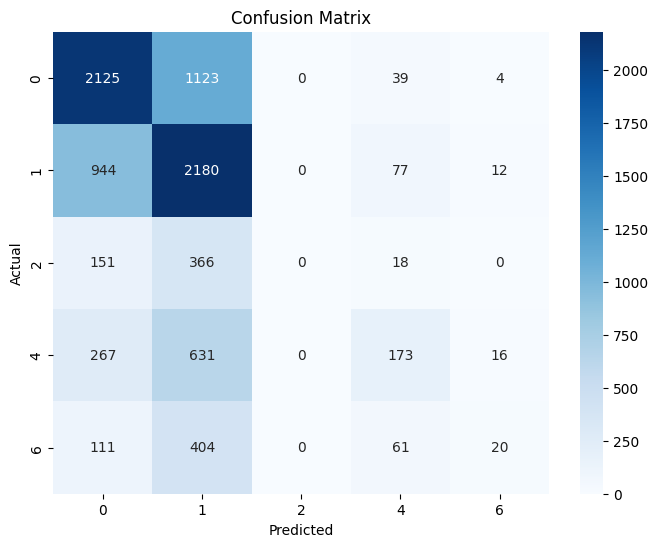

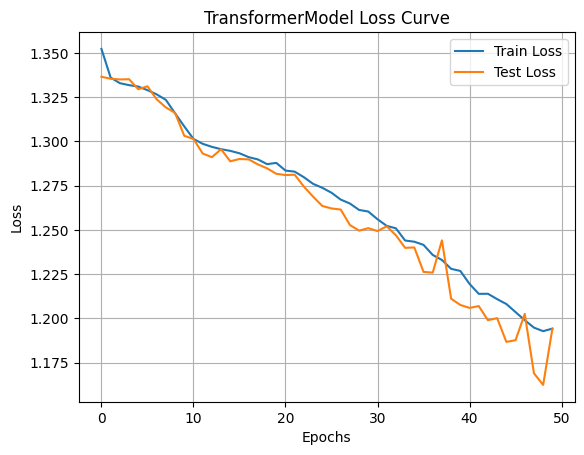

Time taken: 204.62 sec


In [36]:
for name, model_cls in model_dict.items():
    print(f"\n{'='*30}\nTraining {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5).to(device)
    start_time = time.time()
    train_and_evaluate(model, train_loader, test_loader)
    print(f"Time taken: {time.time() - start_time:.2f} sec")


Training Linear Model
Epoch 1, Train Loss: 1.3955, Test Loss: 1.3354
Epoch 5, Train Loss: 1.3023, Test Loss: 1.3033
Epoch 10, Train Loss: 1.2860, Test Loss: 1.2953
Epoch 15, Train Loss: 1.2748, Test Loss: 1.2867
Epoch 20, Train Loss: 1.2621, Test Loss: 1.2828
Epoch 25, Train Loss: 1.2433, Test Loss: 1.2636
Epoch 30, Train Loss: 1.2277, Test Loss: 1.2447
Epoch 35, Train Loss: 1.2144, Test Loss: 1.2635
Epoch 40, Train Loss: 1.1976, Test Loss: 1.2227
Epoch 45, Train Loss: 1.1855, Test Loss: 1.2238
Epoch 50, Train Loss: 1.1699, Test Loss: 1.2213
Epoch 55, Train Loss: 1.1690, Test Loss: 1.2183
Epoch 60, Train Loss: 1.1517, Test Loss: 1.1978
Epoch 65, Train Loss: 1.1425, Test Loss: 1.1874
Epoch 70, Train Loss: 1.1337, Test Loss: 1.1900
Epoch 75, Train Loss: 1.1213, Test Loss: 1.1922
Epoch 80, Train Loss: 1.1081, Test Loss: 1.1873
Epoch 85, Train Loss: 1.0952, Test Loss: 1.2921
Epoch 90, Train Loss: 1.0760, Test Loss: 1.1324
Epoch 95, Train Loss: 1.0423, Test Loss: 1.1134
Epoch 100, Train Lo

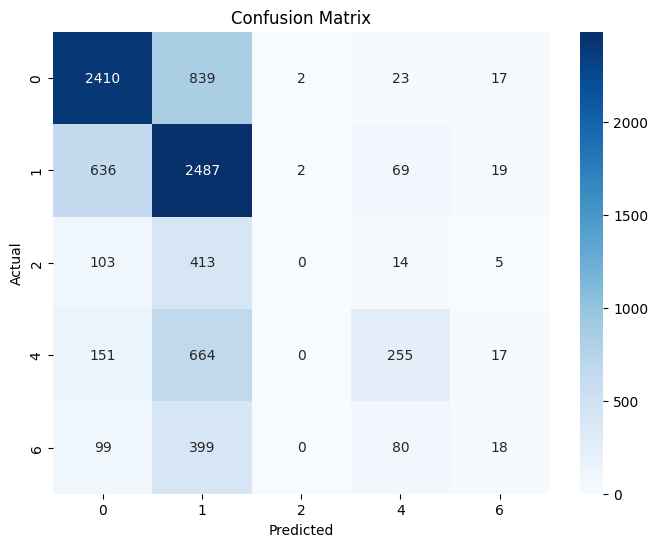

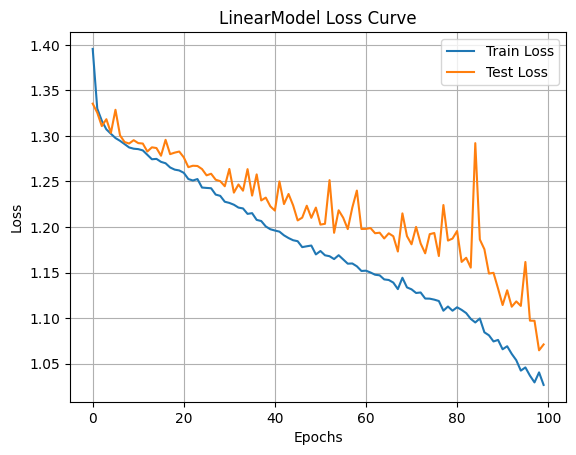

Time taken: 136.48 sec

Training CNN Model
Epoch 1, Train Loss: 1.4122, Test Loss: 1.3577
Epoch 5, Train Loss: 1.3436, Test Loss: 1.3386
Epoch 10, Train Loss: 1.3276, Test Loss: 1.3371
Epoch 15, Train Loss: 1.3181, Test Loss: 1.3186
Epoch 20, Train Loss: 1.3140, Test Loss: 1.3162
Epoch 25, Train Loss: 1.3094, Test Loss: 1.3130
Epoch 30, Train Loss: 1.3065, Test Loss: 1.3078
Epoch 35, Train Loss: 1.3033, Test Loss: 1.3067
Epoch 40, Train Loss: 1.3015, Test Loss: 1.3065
Epoch 45, Train Loss: 1.2988, Test Loss: 1.3046
Epoch 50, Train Loss: 1.2978, Test Loss: 1.3016
Epoch 55, Train Loss: 1.2951, Test Loss: 1.3018
Epoch 60, Train Loss: 1.2932, Test Loss: 1.3020
Epoch 65, Train Loss: 1.2905, Test Loss: 1.3045
Epoch 70, Train Loss: 1.2894, Test Loss: 1.3000
Epoch 75, Train Loss: 1.2867, Test Loss: 1.2962
Epoch 80, Train Loss: 1.2866, Test Loss: 1.2964
Epoch 85, Train Loss: 1.2832, Test Loss: 1.2958
Epoch 90, Train Loss: 1.2818, Test Loss: 1.2943
Epoch 95, Train Loss: 1.2808, Test Loss: 1.2909

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


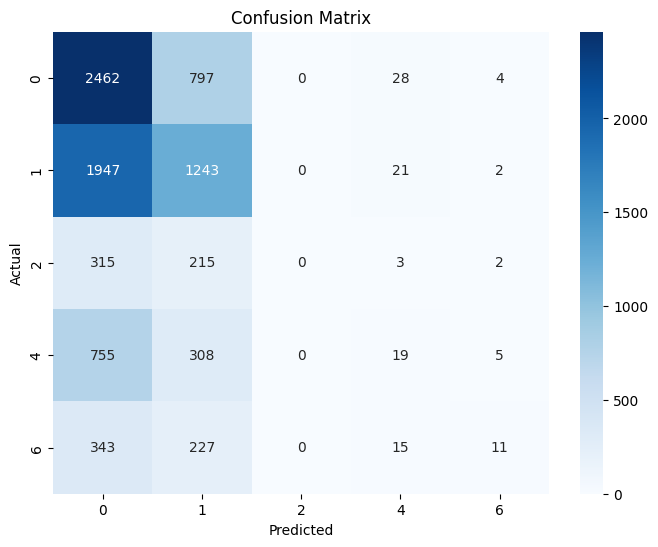

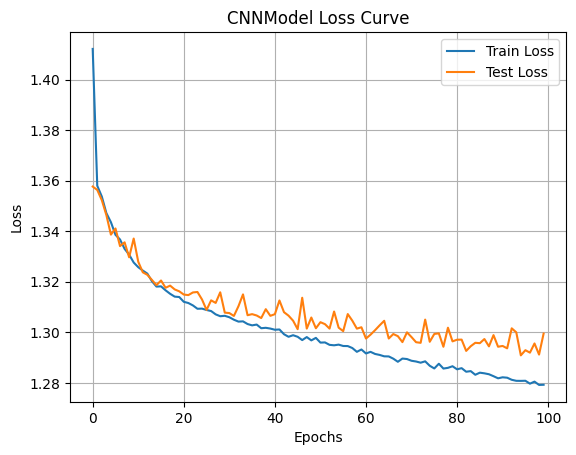

Time taken: 158.18 sec

Training RNN Model
Epoch 1, Train Loss: 1.3616, Test Loss: 1.3427
Epoch 5, Train Loss: 1.3251, Test Loss: 1.3312
Epoch 10, Train Loss: 1.3066, Test Loss: 1.3101
Epoch 15, Train Loss: 1.2991, Test Loss: 1.2979
Epoch 20, Train Loss: 1.2973, Test Loss: 1.2989
Epoch 25, Train Loss: 1.2936, Test Loss: 1.2962
Epoch 30, Train Loss: 1.2892, Test Loss: 1.2907
Epoch 35, Train Loss: 1.2828, Test Loss: 1.2914
Epoch 40, Train Loss: 1.2798, Test Loss: 1.2842
Epoch 45, Train Loss: 1.2746, Test Loss: 1.2837
Epoch 50, Train Loss: 1.2665, Test Loss: 1.2690
Epoch 55, Train Loss: 1.2585, Test Loss: 1.2668
Epoch 60, Train Loss: 1.2493, Test Loss: 1.2455
Epoch 65, Train Loss: 1.2416, Test Loss: 1.2631
Epoch 70, Train Loss: 1.2397, Test Loss: 1.2363
Epoch 75, Train Loss: 1.2375, Test Loss: 1.2559
Epoch 80, Train Loss: 1.2286, Test Loss: 1.2320
Epoch 85, Train Loss: 1.2258, Test Loss: 1.2387
Epoch 90, Train Loss: 1.2206, Test Loss: 1.2348
Epoch 95, Train Loss: 1.2157, Test Loss: 1.2199

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


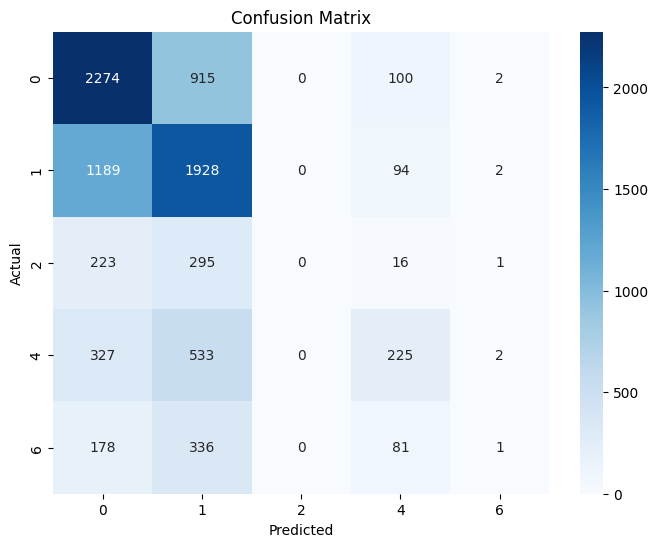

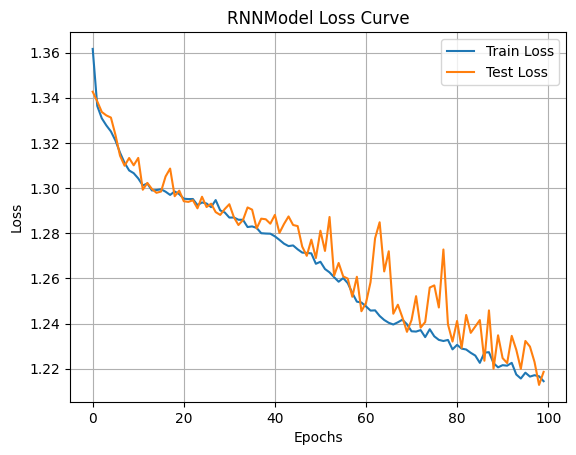

Time taken: 143.06 sec

Training LSTM Model
Epoch 1, Train Loss: 1.3709, Test Loss: 1.3341
Epoch 5, Train Loss: 1.3107, Test Loss: 1.3128
Epoch 10, Train Loss: 1.2958, Test Loss: 1.2951
Epoch 15, Train Loss: 1.2847, Test Loss: 1.2895
Epoch 20, Train Loss: 1.2776, Test Loss: 1.2871
Epoch 25, Train Loss: 1.2688, Test Loss: 1.2817
Epoch 30, Train Loss: 1.2615, Test Loss: 1.2744
Epoch 35, Train Loss: 1.2568, Test Loss: 1.2648
Epoch 40, Train Loss: 1.2519, Test Loss: 1.2660
Epoch 45, Train Loss: 1.2445, Test Loss: 1.2641
Epoch 50, Train Loss: 1.2390, Test Loss: 1.2637
Epoch 55, Train Loss: 1.2299, Test Loss: 1.2422
Epoch 60, Train Loss: 1.2231, Test Loss: 1.2503
Epoch 65, Train Loss: 1.2124, Test Loss: 1.2348
Epoch 70, Train Loss: 1.2084, Test Loss: 1.2372
Epoch 75, Train Loss: 1.2017, Test Loss: 1.2193
Epoch 80, Train Loss: 1.1959, Test Loss: 1.2143
Epoch 85, Train Loss: 1.1919, Test Loss: 1.2259
Epoch 90, Train Loss: 1.1859, Test Loss: 1.2100
Epoch 95, Train Loss: 1.1842, Test Loss: 1.200

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


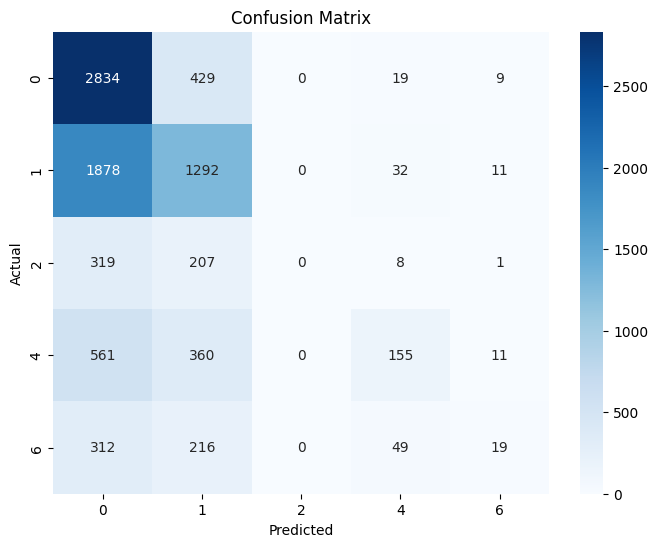

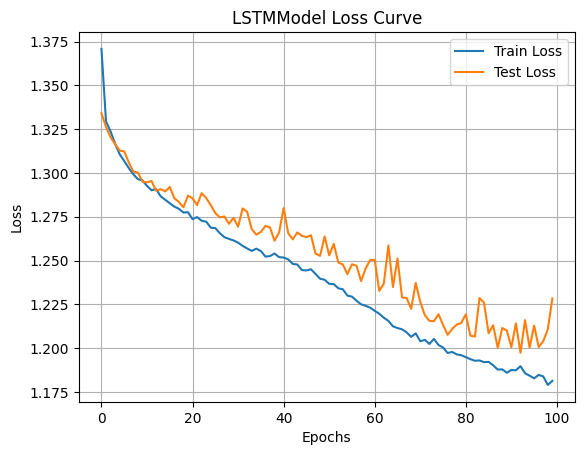

Time taken: 156.23 sec

Training GRU Model
Epoch 1, Train Loss: 1.3634, Test Loss: 1.3435
Epoch 5, Train Loss: 1.3157, Test Loss: 1.3202
Epoch 10, Train Loss: 1.2966, Test Loss: 1.2973
Epoch 15, Train Loss: 1.2886, Test Loss: 1.2941
Epoch 20, Train Loss: 1.2840, Test Loss: 1.2857
Epoch 25, Train Loss: 1.2750, Test Loss: 1.2810
Epoch 30, Train Loss: 1.2681, Test Loss: 1.2747
Epoch 35, Train Loss: 1.2596, Test Loss: 1.2638
Epoch 40, Train Loss: 1.2516, Test Loss: 1.2625
Epoch 45, Train Loss: 1.2427, Test Loss: 1.2578
Epoch 50, Train Loss: 1.2373, Test Loss: 1.2555
Epoch 55, Train Loss: 1.2297, Test Loss: 1.2436
Epoch 60, Train Loss: 1.2220, Test Loss: 1.2363
Epoch 65, Train Loss: 1.2138, Test Loss: 1.2337
Epoch 70, Train Loss: 1.2059, Test Loss: 1.2163
Epoch 75, Train Loss: 1.1977, Test Loss: 1.2182
Epoch 80, Train Loss: 1.1928, Test Loss: 1.2113
Epoch 85, Train Loss: 1.1905, Test Loss: 1.2223
Epoch 90, Train Loss: 1.1865, Test Loss: 1.2055
Epoch 95, Train Loss: 1.1801, Test Loss: 1.2176

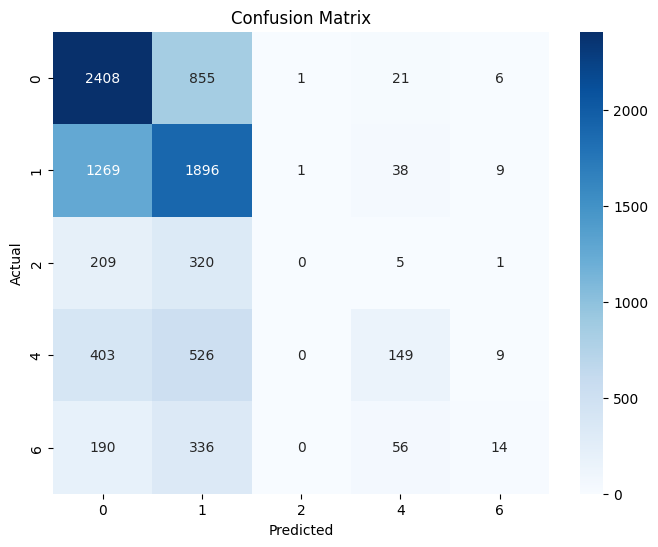

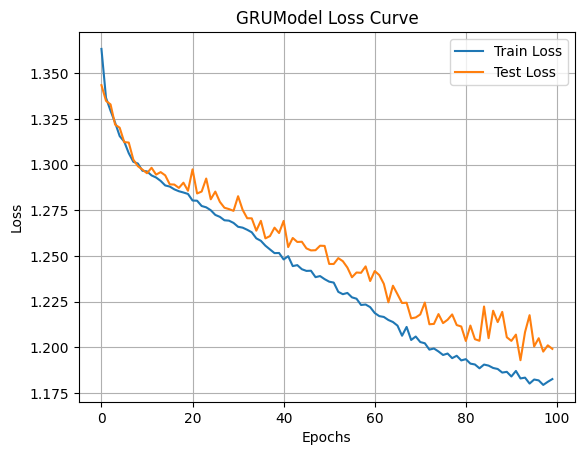

Time taken: 148.88 sec

Training BiLSTM Model
Epoch 1, Train Loss: 1.3534, Test Loss: 1.3334
Epoch 5, Train Loss: 1.3045, Test Loss: 1.3148
Epoch 10, Train Loss: 1.2892, Test Loss: 1.2932
Epoch 15, Train Loss: 1.2797, Test Loss: 1.2974
Epoch 20, Train Loss: 1.2669, Test Loss: 1.2760
Epoch 25, Train Loss: 1.2568, Test Loss: 1.2641
Epoch 30, Train Loss: 1.2501, Test Loss: 1.2585
Epoch 35, Train Loss: 1.2441, Test Loss: 1.2576
Epoch 40, Train Loss: 1.2390, Test Loss: 1.2532
Epoch 45, Train Loss: 1.2335, Test Loss: 1.2494
Epoch 50, Train Loss: 1.2261, Test Loss: 1.2426
Epoch 55, Train Loss: 1.2164, Test Loss: 1.2478
Epoch 60, Train Loss: 1.2030, Test Loss: 1.2258
Epoch 65, Train Loss: 1.1993, Test Loss: 1.2124
Epoch 70, Train Loss: 1.1908, Test Loss: 1.2142
Epoch 75, Train Loss: 1.1862, Test Loss: 1.2611
Epoch 80, Train Loss: 1.1780, Test Loss: 1.2047
Epoch 85, Train Loss: 1.1715, Test Loss: 1.2052
Epoch 90, Train Loss: 1.1687, Test Loss: 1.2047
Epoch 95, Train Loss: 1.1663, Test Loss: 1.1

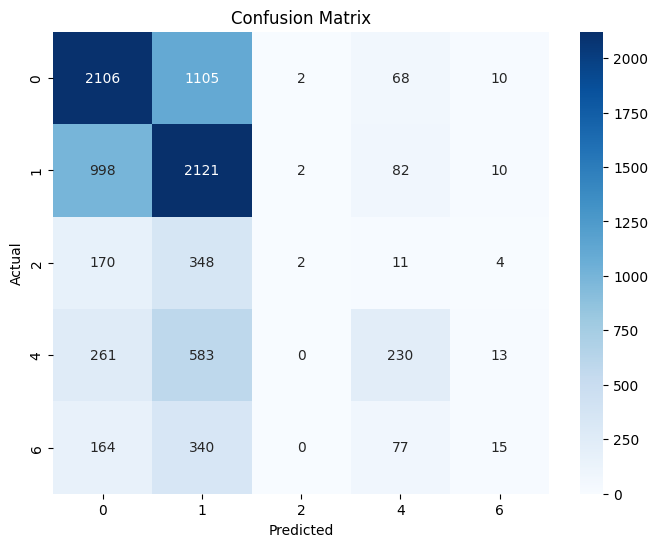

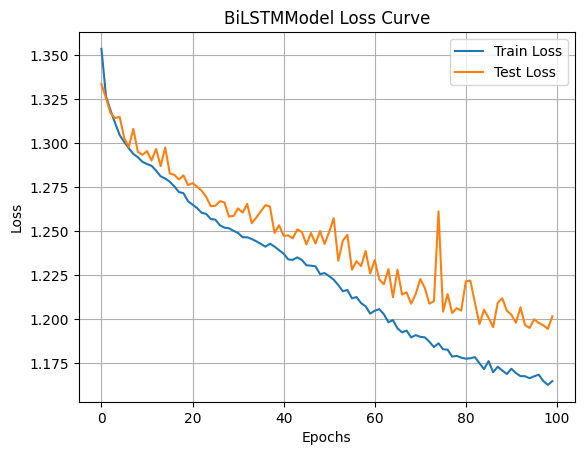

Time taken: 166.77 sec

Training Transformer Model


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Train Loss: 1.3573, Test Loss: 1.3392
Epoch 5, Train Loss: 1.3323, Test Loss: 1.3325
Epoch 10, Train Loss: 1.3172, Test Loss: 1.3154
Epoch 15, Train Loss: 1.2998, Test Loss: 1.2961
Epoch 20, Train Loss: 1.2936, Test Loss: 1.2942
Epoch 25, Train Loss: 1.2863, Test Loss: 1.2851
Epoch 30, Train Loss: 1.2693, Test Loss: 1.2649
Epoch 35, Train Loss: 1.2617, Test Loss: 1.2497
Epoch 40, Train Loss: 1.2513, Test Loss: 1.2432
Epoch 45, Train Loss: 1.2435, Test Loss: 1.2382
Epoch 50, Train Loss: 1.2372, Test Loss: 1.2309
Epoch 55, Train Loss: 1.2331, Test Loss: 1.2296
Epoch 60, Train Loss: 1.2262, Test Loss: 1.2180
Epoch 65, Train Loss: 1.2234, Test Loss: 1.2202
Epoch 70, Train Loss: 1.2181, Test Loss: 1.2169
Epoch 75, Train Loss: 1.2107, Test Loss: 1.2008
Epoch 80, Train Loss: 1.2027, Test Loss: 1.1926
Epoch 85, Train Loss: 1.1980, Test Loss: 1.1845
Epoch 90, Train Loss: 1.1892, Test Loss: 1.1958
Epoch 95, Train Loss: 1.1836, Test Loss: 1.1951
Epoch 100, Train Loss: 1.1782, Test Loss: 

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


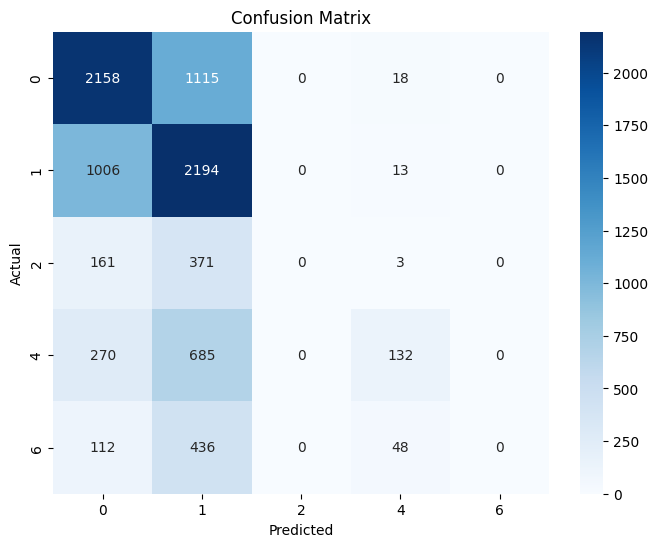

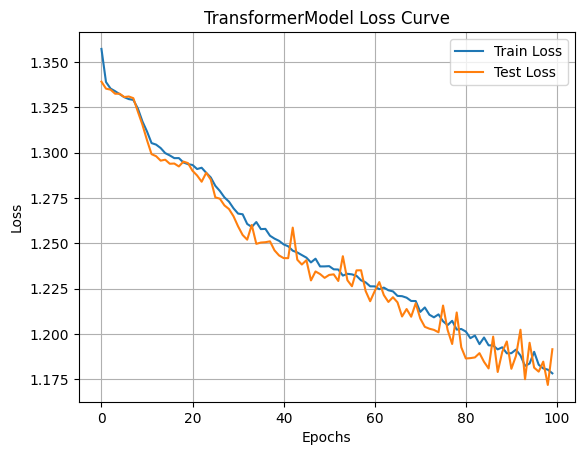

Time taken: 410.10 sec


In [37]:
for name, model_cls in model_dict.items():
    print(f"\n{'='*30}\nTraining {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5).to(device)
    start_time = time.time()
    train_and_evaluate1(model, train_loader, test_loader)
    print(f"Time taken: {time.time() - start_time:.2f} sec")


Training Linear Model
Epoch 1, Train Loss: 1.3585, Test Loss: 1.3294
Epoch 5, Train Loss: 1.2982, Test Loss: 1.2975
Epoch 10, Train Loss: 1.2832, Test Loss: 1.2907
Epoch 15, Train Loss: 1.2683, Test Loss: 1.2806
Epoch 20, Train Loss: 1.2513, Test Loss: 1.2597
Epoch 25, Train Loss: 1.2343, Test Loss: 1.2691
Epoch 30, Train Loss: 1.2226, Test Loss: 1.2368
Epoch 35, Train Loss: 1.2085, Test Loss: 1.2596
Epoch 40, Train Loss: 1.1911, Test Loss: 1.2197
Epoch 45, Train Loss: 1.1831, Test Loss: 1.2106
Epoch 50, Train Loss: 1.1740, Test Loss: 1.2334

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.70      0.60      3291
           1       0.46      0.58      0.51      3213
           2       0.50      0.00      0.00       535
           4       0.47      0.12      0.20      1087
           6       0.36      0.03      0.05       596

    accuracy                           0.49      8722
   macro avg       0.46      0.29      0.27    

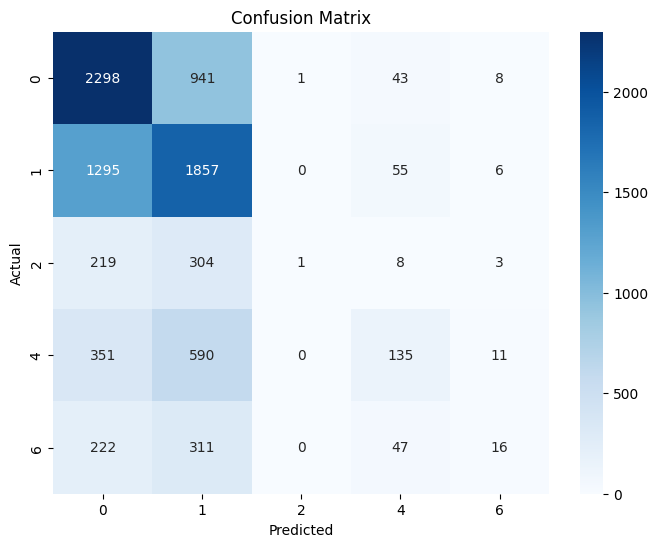

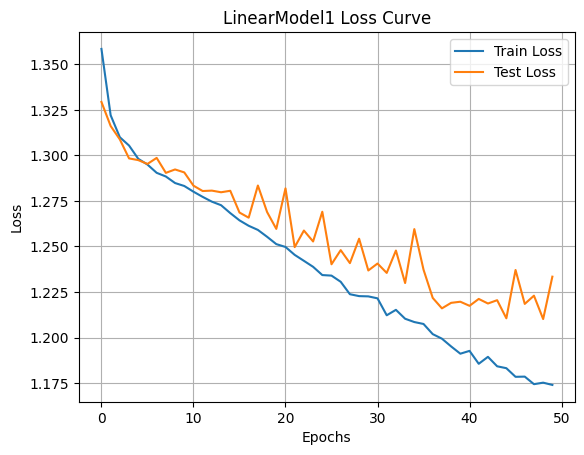

Time taken: 69.57 sec

Training CNN Model
Epoch 1, Train Loss: 1.3697, Test Loss: 1.3475
Epoch 5, Train Loss: 1.3218, Test Loss: 1.3207
Epoch 10, Train Loss: 1.3040, Test Loss: 1.3036
Epoch 15, Train Loss: 1.2944, Test Loss: 1.2925
Epoch 20, Train Loss: 1.2806, Test Loss: 1.2840
Epoch 25, Train Loss: 1.2672, Test Loss: 1.2730
Epoch 30, Train Loss: 1.2523, Test Loss: 1.2598
Epoch 35, Train Loss: 1.2366, Test Loss: 1.2479
Epoch 40, Train Loss: 1.2198, Test Loss: 1.2467
Epoch 45, Train Loss: 1.2026, Test Loss: 1.2287
Epoch 50, Train Loss: 1.1889, Test Loss: 1.2065

Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.56      0.57      3291
           1       0.45      0.68      0.54      3213
           2       0.17      0.00      0.00       535
           4       0.51      0.23      0.32      1087
           6       0.32      0.05      0.08       596

    accuracy                           0.50      8722
   macro avg       0.40     

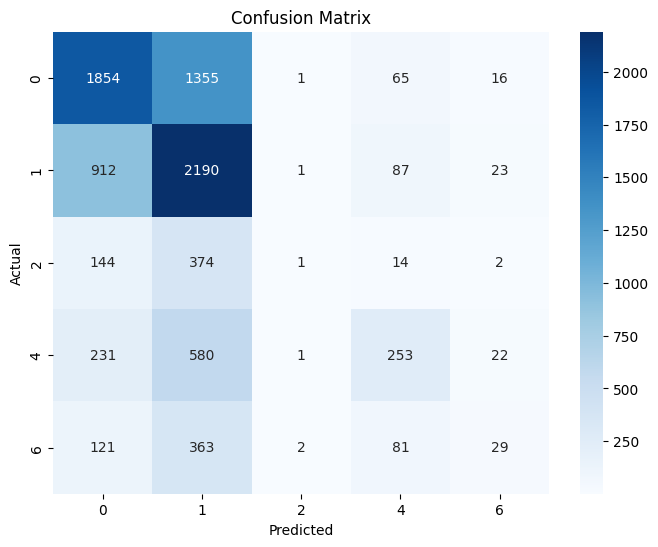

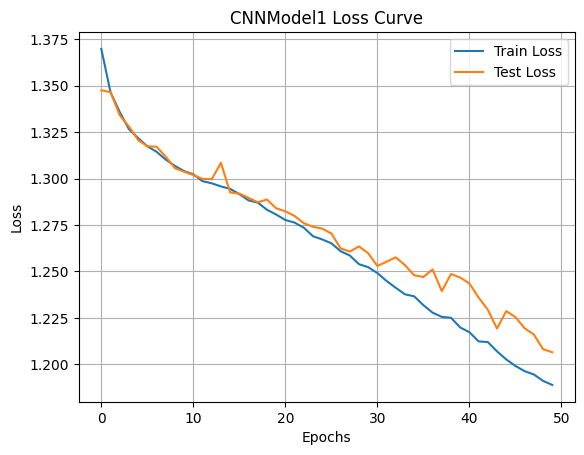

Time taken: 73.36 sec

Training RNN Model
Epoch 1, Train Loss: 1.3405, Test Loss: 1.3354
Epoch 5, Train Loss: 1.3136, Test Loss: 1.3127
Epoch 10, Train Loss: 1.2994, Test Loss: 1.3105
Epoch 15, Train Loss: 1.2959, Test Loss: 1.2937
Epoch 20, Train Loss: 1.2887, Test Loss: 1.2911
Epoch 25, Train Loss: 1.2798, Test Loss: 1.2796
Epoch 30, Train Loss: 1.2676, Test Loss: 1.2803
Epoch 35, Train Loss: 1.2575, Test Loss: 1.2634
Epoch 40, Train Loss: 1.2455, Test Loss: 1.2771
Epoch 45, Train Loss: 1.2360, Test Loss: 1.2431
Epoch 50, Train Loss: 1.2225, Test Loss: 1.2333

Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.47      0.52      3291
           1       0.44      0.75      0.55      3213
           2       0.00      0.00      0.00       535
           4       0.46      0.20      0.28      1087
           6       0.25      0.03      0.06       596

    accuracy                           0.48      8722
   macro avg       0.35     

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


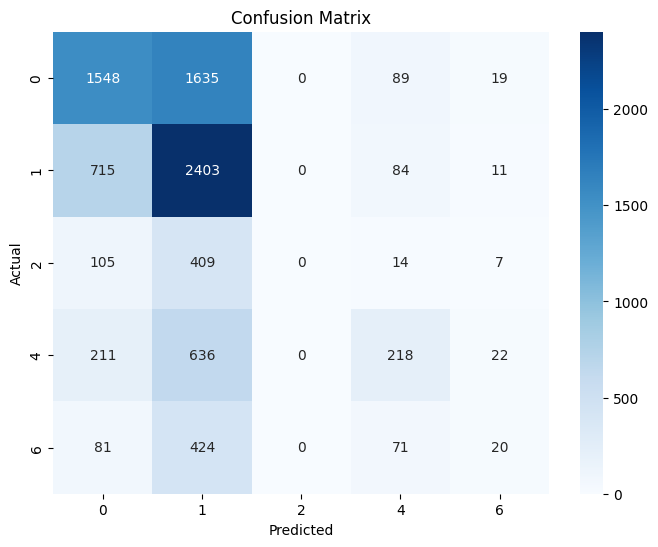

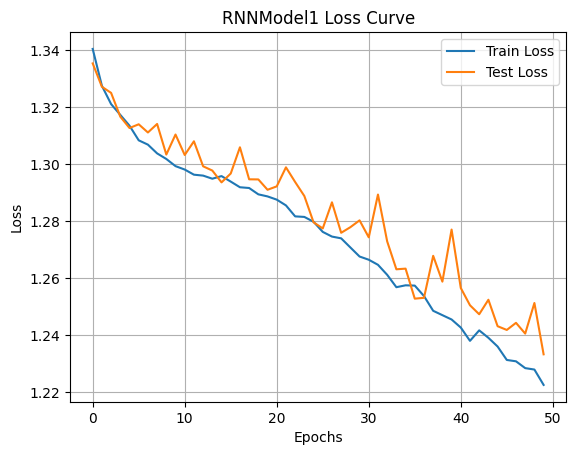

Time taken: 65.30 sec

Training LSTM Model
Epoch 1, Train Loss: 1.3502, Test Loss: 1.3339
Epoch 5, Train Loss: 1.2984, Test Loss: 1.2986
Epoch 10, Train Loss: 1.2873, Test Loss: 1.2881
Epoch 15, Train Loss: 1.2775, Test Loss: 1.2786
Epoch 20, Train Loss: 1.2638, Test Loss: 1.2698
Epoch 25, Train Loss: 1.2517, Test Loss: 1.2622
Epoch 30, Train Loss: 1.2339, Test Loss: 1.2466
Epoch 35, Train Loss: 1.2222, Test Loss: 1.2331
Epoch 40, Train Loss: 1.2108, Test Loss: 1.2317
Epoch 45, Train Loss: 1.1991, Test Loss: 1.2106
Epoch 50, Train Loss: 1.1863, Test Loss: 1.1995

Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.72      0.62      3291
           1       0.49      0.56      0.52      3213
           2       0.25      0.00      0.00       535
           4       0.49      0.26      0.34      1087
           6       0.26      0.03      0.06       596

    accuracy                           0.51      8722
   macro avg       0.40    

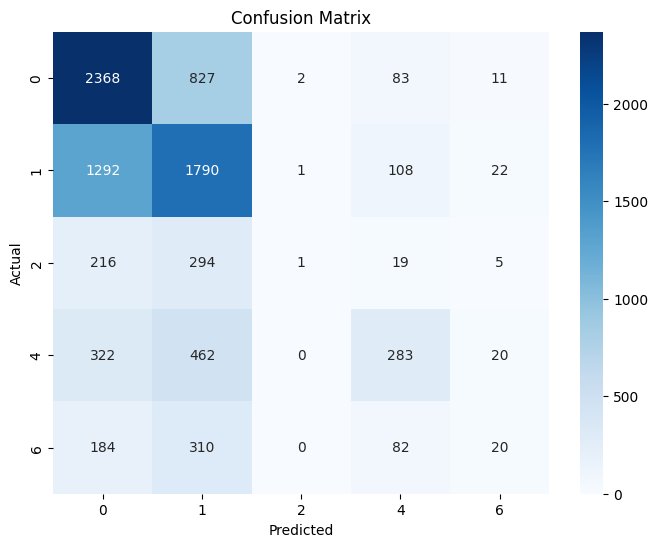

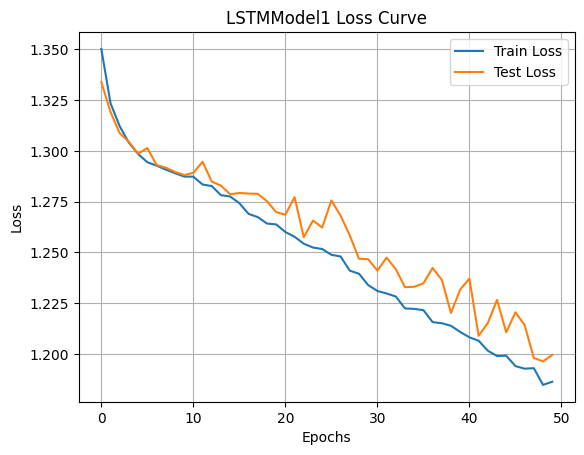

Time taken: 72.65 sec

Training GRU Model
Epoch 1, Train Loss: 1.3413, Test Loss: 1.3285
Epoch 5, Train Loss: 1.2988, Test Loss: 1.2994
Epoch 10, Train Loss: 1.2821, Test Loss: 1.2887
Epoch 15, Train Loss: 1.2655, Test Loss: 1.2694
Epoch 20, Train Loss: 1.2527, Test Loss: 1.2635
Epoch 25, Train Loss: 1.2365, Test Loss: 1.2406
Epoch 30, Train Loss: 1.2225, Test Loss: 1.2431
Epoch 35, Train Loss: 1.2054, Test Loss: 1.2291
Epoch 40, Train Loss: 1.1891, Test Loss: 1.2688
Epoch 45, Train Loss: 1.1687, Test Loss: 1.1750
Epoch 50, Train Loss: 1.1620, Test Loss: 1.1907

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.68      0.62      3291
           1       0.47      0.66      0.55      3213
           2       0.00      0.00      0.00       535
           4       0.66      0.13      0.21      1087
           6       0.38      0.03      0.05       596

    accuracy                           0.52      8722
   macro avg       0.41     

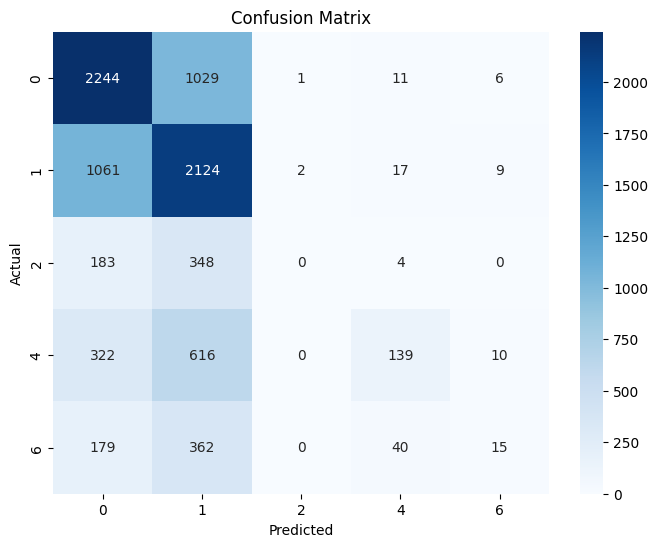

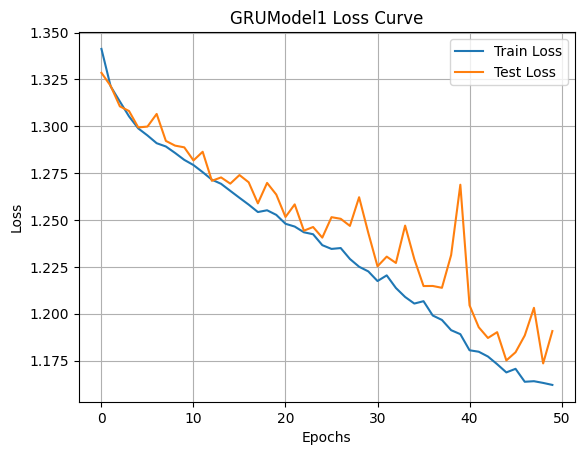

Time taken: 70.66 sec

Training BiLSTM Model
Epoch 1, Train Loss: 1.3479, Test Loss: 1.3317
Epoch 5, Train Loss: 1.2977, Test Loss: 1.2991
Epoch 10, Train Loss: 1.2869, Test Loss: 1.2896
Epoch 15, Train Loss: 1.2756, Test Loss: 1.2792
Epoch 20, Train Loss: 1.2567, Test Loss: 1.2754
Epoch 25, Train Loss: 1.2470, Test Loss: 1.2586
Epoch 30, Train Loss: 1.2354, Test Loss: 1.2501
Epoch 35, Train Loss: 1.2246, Test Loss: 1.2391
Epoch 40, Train Loss: 1.2077, Test Loss: 1.2226
Epoch 45, Train Loss: 1.1909, Test Loss: 1.2162
Epoch 50, Train Loss: 1.1802, Test Loss: 1.2185

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.45      0.53      3291
           1       0.45      0.82      0.58      3213
           2       0.14      0.00      0.00       535
           4       0.49      0.19      0.28      1087
           6       0.23      0.03      0.05       596

    accuracy                           0.50      8722
   macro avg       0.39  

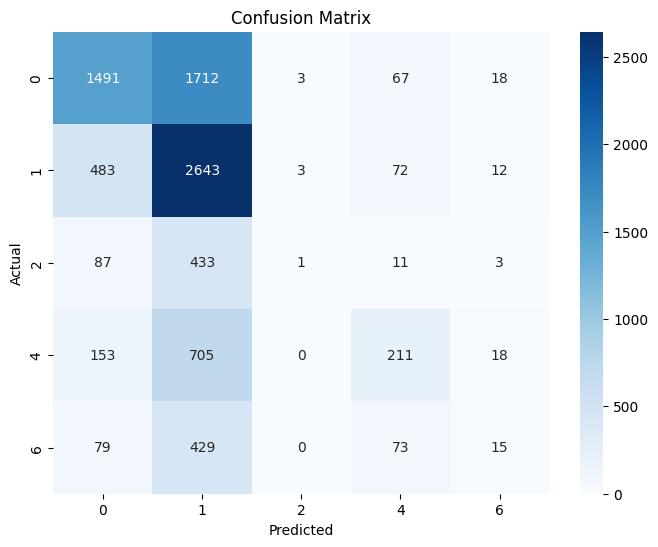

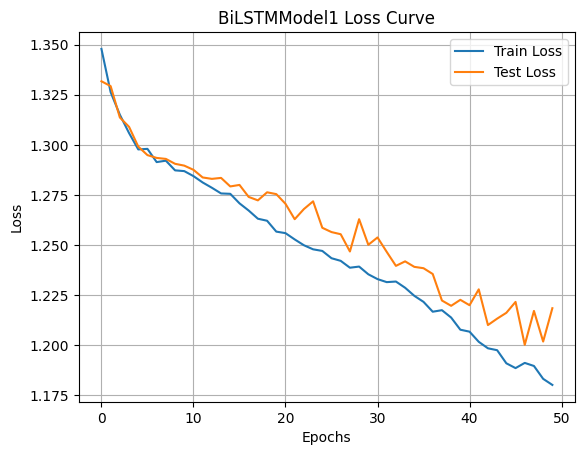

Time taken: 91.73 sec

Training Transformer Model


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Train Loss: 1.3521, Test Loss: 1.3365
Epoch 5, Train Loss: 1.3285, Test Loss: 1.3294
Epoch 10, Train Loss: 1.3047, Test Loss: 1.3031
Epoch 15, Train Loss: 1.2907, Test Loss: 1.2902
Epoch 20, Train Loss: 1.2838, Test Loss: 1.2805
Epoch 25, Train Loss: 1.2701, Test Loss: 1.2683
Epoch 30, Train Loss: 1.2577, Test Loss: 1.2578
Epoch 35, Train Loss: 1.2447, Test Loss: 1.2413
Epoch 40, Train Loss: 1.2262, Test Loss: 1.2137
Epoch 45, Train Loss: 1.2142, Test Loss: 1.2234
Epoch 50, Train Loss: 1.2020, Test Loss: 1.1891

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.63      0.60      3291
           1       0.47      0.68      0.56      3213
           2       0.00      0.00      0.00       535
           4       0.48      0.23      0.31      1087
           6       0.38      0.03      0.05       596

    accuracy                           0.52      8722
   macro avg       0.38      0.31      0.30      8722
weighted avg    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


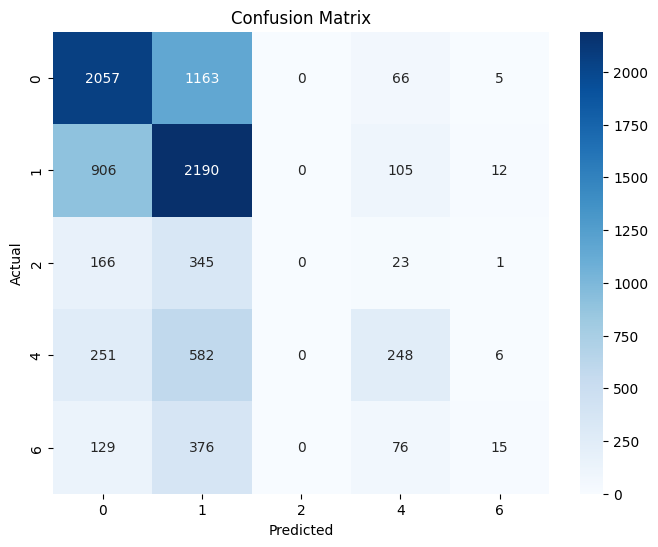

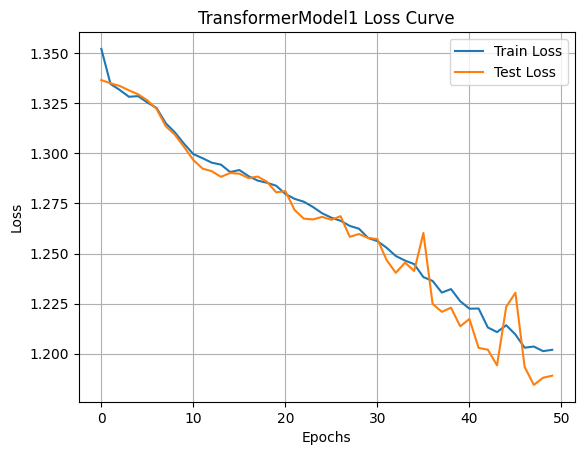

Time taken: 202.98 sec


In [38]:
for name, model_cls in model_dict1.items():
    print(f"\n{'='*30}\nTraining {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5).to(device)
    start_time = time.time()
    train_and_evaluate(model, train_loader, test_loader)
    print(f"Time taken: {time.time() - start_time:.2f} sec")


Training Linear Model
Epoch 1, Train Loss: 1.3529, Test Loss: 1.3319
Epoch 5, Train Loss: 1.2984, Test Loss: 1.3013
Epoch 10, Train Loss: 1.2789, Test Loss: 1.2812
Epoch 15, Train Loss: 1.2633, Test Loss: 1.2693
Epoch 20, Train Loss: 1.2442, Test Loss: 1.2790
Epoch 25, Train Loss: 1.2337, Test Loss: 1.2407
Epoch 30, Train Loss: 1.2147, Test Loss: 1.2261
Epoch 35, Train Loss: 1.1954, Test Loss: 1.2123
Epoch 40, Train Loss: 1.1815, Test Loss: 1.2198
Epoch 45, Train Loss: 1.1718, Test Loss: 1.1974
Epoch 50, Train Loss: 1.1628, Test Loss: 1.1814
Epoch 55, Train Loss: 1.1466, Test Loss: 1.1721
Epoch 60, Train Loss: 1.1418, Test Loss: 1.1804
Epoch 65, Train Loss: 1.1317, Test Loss: 1.1807
Epoch 70, Train Loss: 1.1115, Test Loss: 1.1421
Epoch 75, Train Loss: 1.0985, Test Loss: 1.1594
Epoch 80, Train Loss: 1.0867, Test Loss: 1.1258
Epoch 85, Train Loss: 1.0768, Test Loss: 1.1421
Epoch 90, Train Loss: 1.0603, Test Loss: 1.1003
Epoch 95, Train Loss: 1.0357, Test Loss: 1.0715
Epoch 100, Train Lo

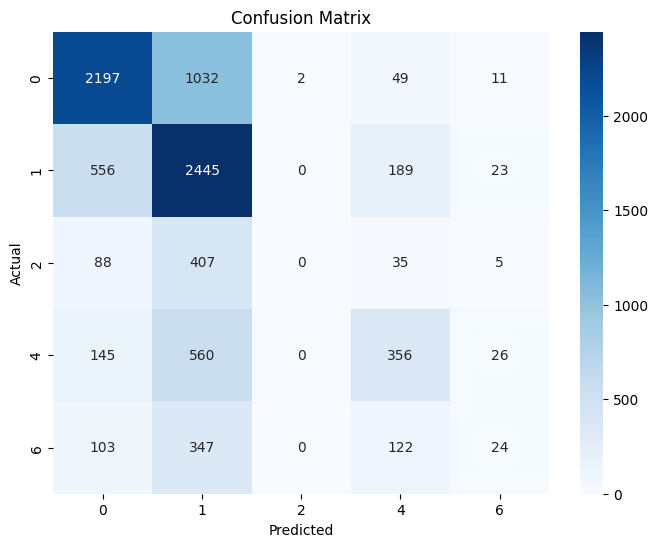

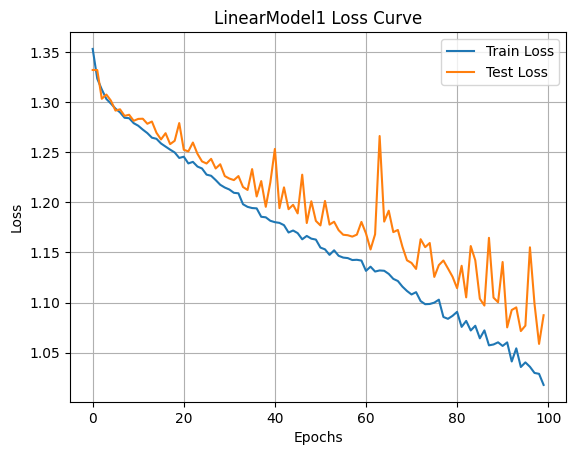

Time taken: 198.43 sec

Training CNN Model
Epoch 1, Train Loss: 1.3641, Test Loss: 1.3524
Epoch 5, Train Loss: 1.3154, Test Loss: 1.3150
Epoch 10, Train Loss: 1.2965, Test Loss: 1.3014
Epoch 15, Train Loss: 1.2850, Test Loss: 1.2869
Epoch 20, Train Loss: 1.2715, Test Loss: 1.2836
Epoch 25, Train Loss: 1.2592, Test Loss: 1.2708
Epoch 30, Train Loss: 1.2467, Test Loss: 1.2627
Epoch 35, Train Loss: 1.2328, Test Loss: 1.2506
Epoch 40, Train Loss: 1.2182, Test Loss: 1.2451
Epoch 45, Train Loss: 1.2021, Test Loss: 1.2413
Epoch 50, Train Loss: 1.1867, Test Loss: 1.2237
Epoch 55, Train Loss: 1.1710, Test Loss: 1.2012
Epoch 60, Train Loss: 1.1557, Test Loss: 1.1933
Epoch 65, Train Loss: 1.1430, Test Loss: 1.1981
Epoch 70, Train Loss: 1.1301, Test Loss: 1.1758
Epoch 75, Train Loss: 1.1189, Test Loss: 1.1714
Epoch 80, Train Loss: 1.1058, Test Loss: 1.1689
Epoch 85, Train Loss: 1.0958, Test Loss: 1.1575
Epoch 90, Train Loss: 1.0858, Test Loss: 1.1365
Epoch 95, Train Loss: 1.0789, Test Loss: 1.1405

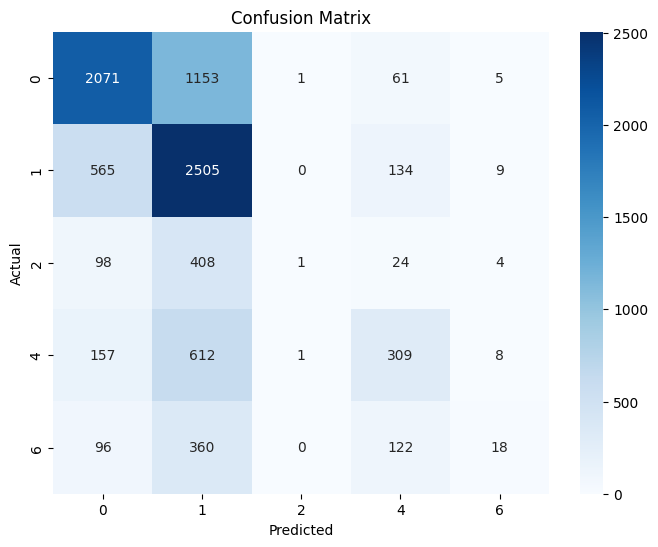

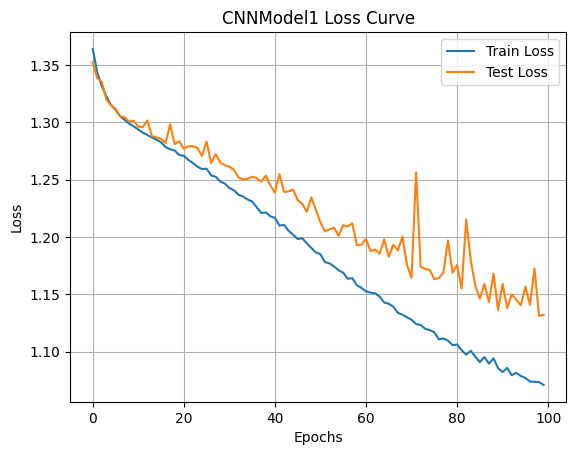

Time taken: 177.15 sec

Training RNN Model
Epoch 1, Train Loss: 1.3440, Test Loss: 1.3289
Epoch 5, Train Loss: 1.3028, Test Loss: 1.3000
Epoch 10, Train Loss: 1.2927, Test Loss: 1.2966
Epoch 15, Train Loss: 1.2853, Test Loss: 1.2874
Epoch 20, Train Loss: 1.2782, Test Loss: 1.2807
Epoch 25, Train Loss: 1.2666, Test Loss: 1.2715
Epoch 30, Train Loss: 1.2573, Test Loss: 1.2660
Epoch 35, Train Loss: 1.2472, Test Loss: 1.2588
Epoch 40, Train Loss: 1.2415, Test Loss: 1.2490
Epoch 45, Train Loss: 1.2333, Test Loss: 1.2446
Epoch 50, Train Loss: 1.2329, Test Loss: 1.2658
Epoch 55, Train Loss: 1.2304, Test Loss: 1.2603
Epoch 60, Train Loss: 1.2239, Test Loss: 1.2438
Epoch 65, Train Loss: 1.2214, Test Loss: 1.2321
Epoch 70, Train Loss: 1.2163, Test Loss: 1.2275
Epoch 75, Train Loss: 1.2161, Test Loss: 1.2400
Epoch 80, Train Loss: 1.2110, Test Loss: 1.2718
Epoch 85, Train Loss: 1.2062, Test Loss: 1.2465
Epoch 90, Train Loss: 1.2040, Test Loss: 1.2562
Epoch 95, Train Loss: 1.2021, Test Loss: 1.2414

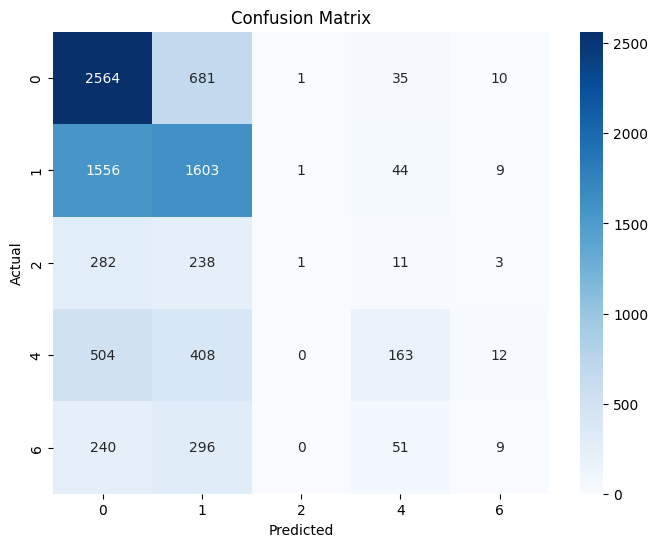

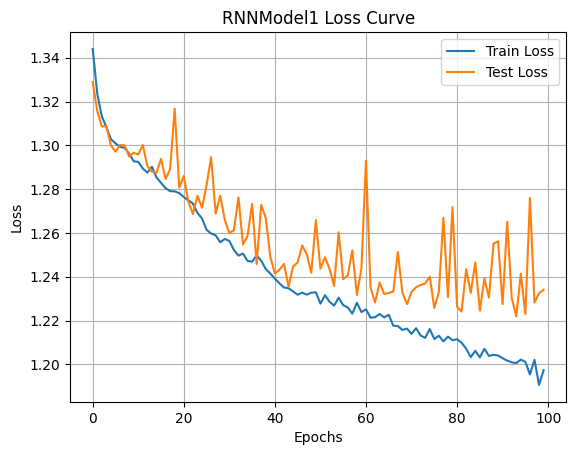

Time taken: 157.68 sec

Training LSTM Model
Epoch 1, Train Loss: 1.3491, Test Loss: 1.3341
Epoch 5, Train Loss: 1.3005, Test Loss: 1.3027
Epoch 10, Train Loss: 1.2907, Test Loss: 1.2890
Epoch 15, Train Loss: 1.2815, Test Loss: 1.2919
Epoch 20, Train Loss: 1.2661, Test Loss: 1.2726
Epoch 25, Train Loss: 1.2521, Test Loss: 1.2823
Epoch 30, Train Loss: 1.2400, Test Loss: 1.2455
Epoch 35, Train Loss: 1.2249, Test Loss: 1.2410
Epoch 40, Train Loss: 1.2127, Test Loss: 1.2267
Epoch 45, Train Loss: 1.2007, Test Loss: 1.2131
Epoch 50, Train Loss: 1.1852, Test Loss: 1.2278
Epoch 55, Train Loss: 1.1726, Test Loss: 1.1889
Epoch 60, Train Loss: 1.1618, Test Loss: 1.2178
Epoch 65, Train Loss: 1.1565, Test Loss: 1.2045
Epoch 70, Train Loss: 1.1499, Test Loss: 1.1764
Epoch 75, Train Loss: 1.1403, Test Loss: 1.1670
Epoch 80, Train Loss: 1.1356, Test Loss: 1.1708
Epoch 85, Train Loss: 1.1268, Test Loss: 1.1856
Epoch 90, Train Loss: 1.1250, Test Loss: 1.1729
Epoch 95, Train Loss: 1.1180, Test Loss: 1.164

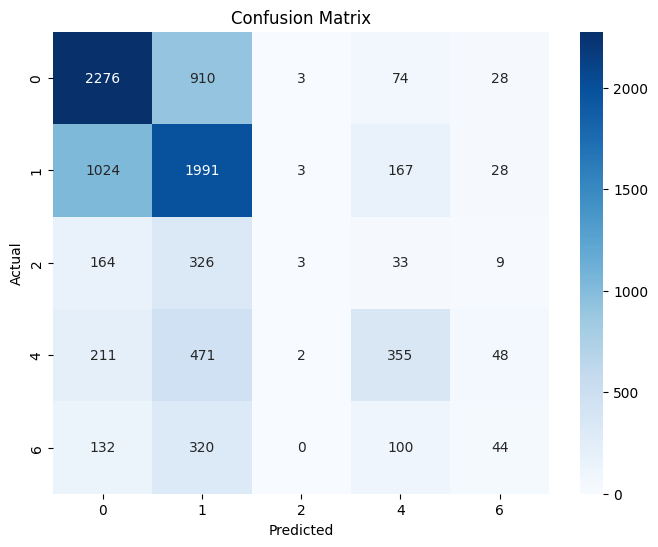

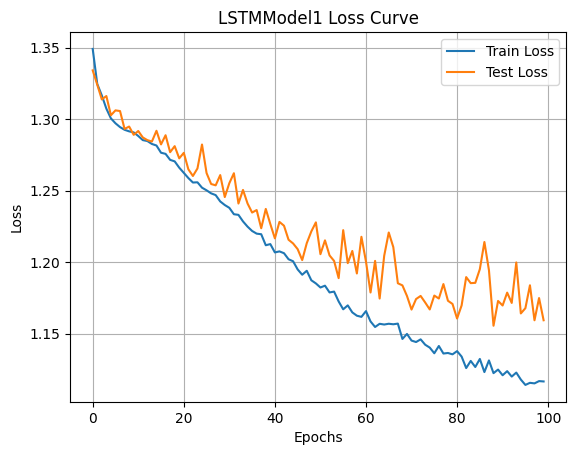

Time taken: 159.18 sec

Training GRU Model
Epoch 1, Train Loss: 1.3430, Test Loss: 1.3346
Epoch 5, Train Loss: 1.3037, Test Loss: 1.3003
Epoch 10, Train Loss: 1.2875, Test Loss: 1.2909
Epoch 15, Train Loss: 1.2762, Test Loss: 1.2823
Epoch 20, Train Loss: 1.2599, Test Loss: 1.2685
Epoch 25, Train Loss: 1.2466, Test Loss: 1.2637
Epoch 30, Train Loss: 1.2354, Test Loss: 1.2531
Epoch 35, Train Loss: 1.2260, Test Loss: 1.2464
Epoch 40, Train Loss: 1.2175, Test Loss: 1.2738
Epoch 45, Train Loss: 1.2023, Test Loss: 1.2456
Epoch 50, Train Loss: 1.1879, Test Loss: 1.2169
Epoch 55, Train Loss: 1.1776, Test Loss: 1.2054
Epoch 60, Train Loss: 1.1633, Test Loss: 1.2151
Epoch 65, Train Loss: 1.1543, Test Loss: 1.1904
Epoch 70, Train Loss: 1.1464, Test Loss: 1.1828
Epoch 75, Train Loss: 1.1338, Test Loss: 1.1778
Epoch 80, Train Loss: 1.1151, Test Loss: 1.1733
Epoch 85, Train Loss: 1.1000, Test Loss: 1.1509
Epoch 90, Train Loss: 1.0769, Test Loss: 1.1413
Epoch 95, Train Loss: 1.0483, Test Loss: 1.1116

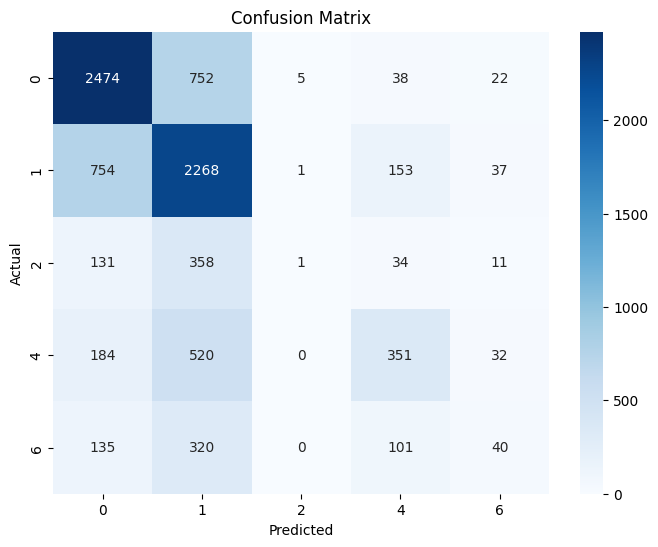

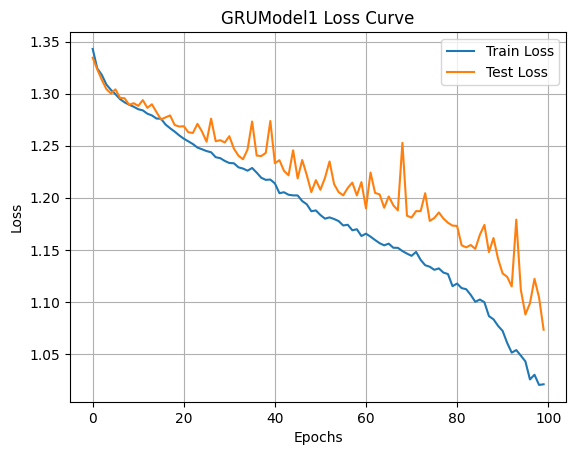

Time taken: 140.94 sec

Training BiLSTM Model
Epoch 1, Train Loss: 1.3593, Test Loss: 1.3346
Epoch 5, Train Loss: 1.3045, Test Loss: 1.3063
Epoch 10, Train Loss: 1.2897, Test Loss: 1.2936
Epoch 15, Train Loss: 1.2806, Test Loss: 1.2934
Epoch 20, Train Loss: 1.2697, Test Loss: 1.2830
Epoch 25, Train Loss: 1.2610, Test Loss: 1.2684
Epoch 30, Train Loss: 1.2516, Test Loss: 1.2662
Epoch 35, Train Loss: 1.2394, Test Loss: 1.2813
Epoch 40, Train Loss: 1.2277, Test Loss: 1.2367
Epoch 45, Train Loss: 1.2145, Test Loss: 1.2367
Epoch 50, Train Loss: 1.2047, Test Loss: 1.2244
Epoch 55, Train Loss: 1.1903, Test Loss: 1.2174
Epoch 60, Train Loss: 1.1804, Test Loss: 1.1969
Epoch 65, Train Loss: 1.1667, Test Loss: 1.1890
Epoch 70, Train Loss: 1.1609, Test Loss: 1.1898
Epoch 75, Train Loss: 1.1583, Test Loss: 1.1920
Epoch 80, Train Loss: 1.1469, Test Loss: 1.1967
Epoch 85, Train Loss: 1.1392, Test Loss: 1.1735
Epoch 90, Train Loss: 1.1307, Test Loss: 1.1642
Epoch 95, Train Loss: 1.1173, Test Loss: 1.1

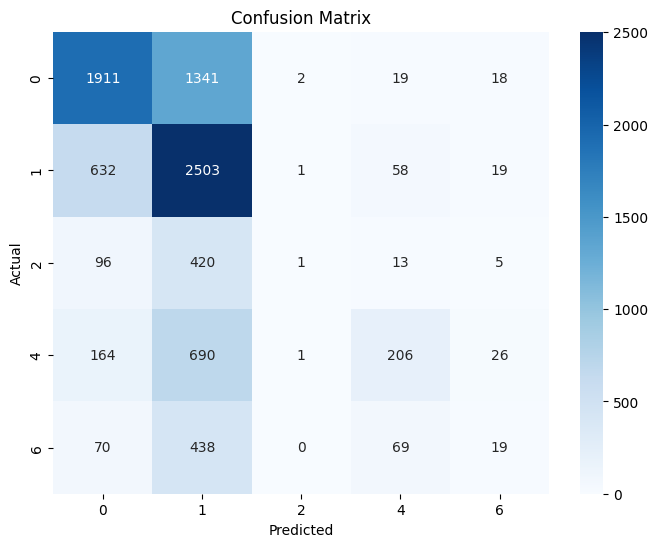

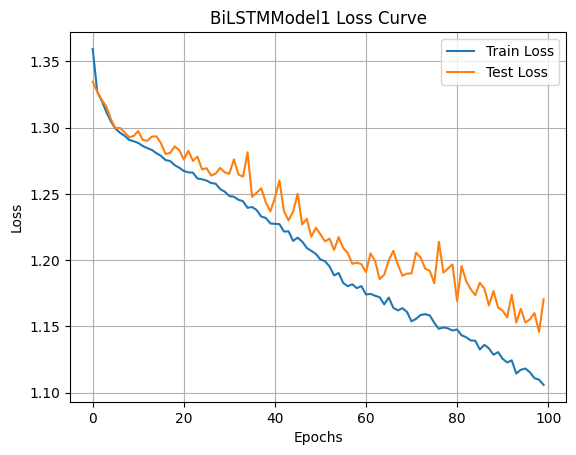

Time taken: 159.70 sec

Training Transformer Model


c:\Python312\Lib\site-packages\torch\nn\modules\transformer.py:379: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


Epoch 1, Train Loss: 1.3669, Test Loss: 1.3354
Epoch 5, Train Loss: 1.3298, Test Loss: 1.3302
Epoch 10, Train Loss: 1.3065, Test Loss: 1.3003
Epoch 15, Train Loss: 1.2956, Test Loss: 1.2926
Epoch 20, Train Loss: 1.2887, Test Loss: 1.2864
Epoch 25, Train Loss: 1.2748, Test Loss: 1.2707
Epoch 30, Train Loss: 1.2627, Test Loss: 1.2589
Epoch 35, Train Loss: 1.2530, Test Loss: 1.2441
Epoch 40, Train Loss: 1.2417, Test Loss: 1.2366
Epoch 45, Train Loss: 1.2261, Test Loss: 1.2210
Epoch 50, Train Loss: 1.2123, Test Loss: 1.2090
Epoch 55, Train Loss: 1.1925, Test Loss: 1.1887
Epoch 60, Train Loss: 1.1844, Test Loss: 1.1656
Epoch 65, Train Loss: 1.1701, Test Loss: 1.2043
Epoch 70, Train Loss: 1.1616, Test Loss: 1.1520
Epoch 75, Train Loss: 1.1543, Test Loss: 1.1237
Epoch 80, Train Loss: 1.1433, Test Loss: 1.1162
Epoch 85, Train Loss: 1.1372, Test Loss: 1.1113
Epoch 90, Train Loss: 1.1291, Test Loss: 1.1096
Epoch 95, Train Loss: 1.1145, Test Loss: 1.0999
Epoch 100, Train Loss: 1.1081, Test Loss: 

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


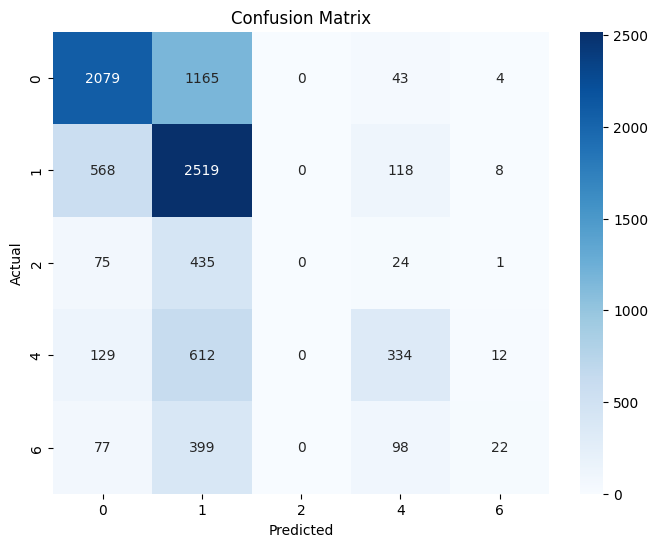

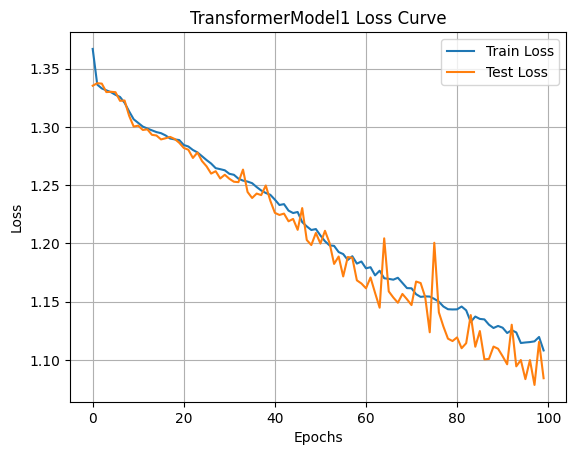

Time taken: 403.55 sec


In [36]:
for name, model_cls in model_dict1.items():
    print(f"\n{'='*30}\nTraining {name} Model\n{'='*30}")
    model = model_cls(input_dim=x_train.shape[1], num_classes=5).to(device)
    start_time = time.time()
    train_and_evaluate1(model, train_loader, test_loader)
    print(f"Time taken: {time.time() - start_time:.2f} sec")